In [1]:
import glob
import logging
from multiprocessing import Pool
import os
import sys

from astropy.io import fits
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.stats import sigma_clip
import numpy as np
import tempfile
import threading
from threading import Thread
from photutils import DAOStarFinder
from photutils import detect_sources
from photutils import detect_threshold


from pyql.database.ql_database_interface import session
from pyql.database.ql_database_interface import Master
from pyql.database.ql_database_interface import IR_flt_0

ImportError: No module named 'pyql'

In [ ]:
#test data:
import numpy as np
from astropy.io import fits 
file='/grp/hst/wfc3a/GO_Links/12167/Visit02/ibhg02q2q_flt.fits'
#file='/grp/hst/wfc3f/QL_GO/12025/Visit08/ibg808jxq_flt.fits'
hdulist=fits.open(file)
data=hdulist[1].data
data1=hdulist[1].data
data2=hdulist[1].data
data3=hdulist[1].data
hdulist.close()

In [ ]:
import scipy
from scipy.stats import sigmaclip
from scipy.ndimage import gaussian_filter

clip,low,high=sigmaclip(data)
s=clip.std()

k = np.array([[1,1,1],[1,1,1],[1,1,1]])
from scipy import ndimage
data_con=ndimage.convolve(data, k, mode='constant', cval=0.0)

In [ ]:
%matplotlib inline
import numpy as np
from astropy.io import fits
#data=np.array([[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,26.,1.,1.,1.,1.,1.,1.,1.,20.,1.],[1.,1.,1.,1.,20.,30.,15.,1.,1.,1.,1.,1.,15.,56.,10.],[1.,1.,1.,1.,1.,20.,1.,1.,1.,1.,1.,1.,8.,20.,5.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]])
#hdulist=fits.open(locales[3])
#data=hdulist[1].data
#hdulist.close()
from photutils import detect_threshold
threshold = detect_threshold(data, snr=3.)
threshold_con = detect_threshold(data_con, snr=3.)
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
sigma = 2.0 * gaussian_fwhm_to_sigma    # FWHM = 2.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(data, threshold, npixels=5, filter_kernel=kernel)
segm_con = detect_sources(data_con, threshold_con, npixels=5, filter_kernel=kernel)

import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(segm, origin='lower',cmap=segm.cmap(random_state=12345))# cmap='Greys_r', norm=norm)
ax2.imshow(segm_con, origin='lower', cmap=segm.cmap(random_state=12345))
print(segm.array)
print(segm_con.array)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import morphology
sq = morphology.square(width=5)
dia = morphology.diamond(radius=1)
print(sq)
print(dia)


In [ ]:
mask=morphology.dilation(segm, sq)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(50, 50))
ax1.imshow(segm, origin='lower',cmap=segm.cmap(random_state=12345))# cmap='Greys_r', norm=norm)
ax2.imshow(segm_con, origin='lower', cmap=segm.cmap(random_state=12345))
ax3.imshow(mask, origin='lower', cmap=segm.cmap(random_state=12345))
#print(segm.array)

In [ ]:
dq=fits.getdata(file, ext=3)
#print(dq)
bit_mask = (4+16+32+128+512)
dq0 = np.bitwise_and(dq,np.zeros(np.shape(dq),'Int16')+ bit_mask)
dq0==0
dq0[dq0>0]=1
#data_grown[dq0!=0]=np.nan
print(dq0)

mask[dq0>0]=1
#print(data_grown)
data[mask>0]=np.nan
print(data)


dq=fits.getdata(file, ext=3)
#print(dq)
bit_mask = (4+16+32+128+512)
dq0 = np.bitwise_and(dq,np.zeros(np.shape(dq),'Int16')+ bit_mask)
dq0==0
dq0[dq0>0.0]=1.0
#data_grown[dq0!=0]=np.nan
print(dq0)
seg_arr=segm_con.array
seg_arr[seg_arr>0]=1.0
seg_arr[dq0>0.0]=1.0
#print(data_grown)
data1[seg_arr>0.0]=np.nan
print(data1)

In [ ]:
n, b, histogram=plt.hist(data.ravel(), bins=1000, range=(0.25, 1.25), alpha=.5)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixles with that Value')
plt.title('image')
plt.legend(loc='upper right')

In [ ]:
n, b, histogram=plt.hist(data1.ravel(), bins=1000, range=(0.25, 1.25))#, alpha=.5)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixles with that Value')
plt.title('image')
plt.legend(loc='upper right')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

n, b, histogram=plt.hist(data2.ravel(), bins=1000, range=(0.25, 1.25))#, alpha=.5)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixles with that Value')
plt.title('image')
plt.legend(loc='upper right')

In [ ]:
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import Gaussian2DKernel

In [ ]:
gauss = Gaussian2DKernel(stddev=2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

segm_arr=segm.array
segm_arr[segm_arr>0]=1.0
#segm_arr[dq0>0]=1

# Create kernel
g = Gaussian2DKernel(stddev=8)

# Convolve data
z = convolve(segm_arr, g, boundary='extend')

# Plot data before and after convolution
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(50, 50))
ax1.imshow(segm, origin='lower',cmap=segm.cmap(random_state=12345))# cmap='Greys_r', norm=norm)
ax2.imshow(segm_con, origin='lower', cmap=segm.cmap(random_state=12345))
#ax3.imshow(mask, origin='lower', cmap=segm.cmap(random_state=12345))
ax3.imshow(z, origin='lower', cmap=segm.cmap(random_state=12345))
#print(segm.array)

In [ ]:
print(z)

In [ ]:
z[z>0.003]=1
z[z<0.003]=0
print(z)

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(z, origin='lower')#,cmap=segm.cmap(random_state=12345))

In [ ]:
dq=fits.getdata(file, ext=3)
#print(dq)
bit_mask = (4+16+32+128+512)
dq0 = np.bitwise_and(dq,np.zeros(np.shape(dq),'Int16')+ bit_mask)
dq0==0
dq0[dq0>0.0]=1.0
#data_grown[dq0!=0]=np.nan
#print(dq0)
#seg_arr=segm_con.array
#z[z>0.003]=1
z[dq0>0.0]=1.0
#print(data_grown)
data3[z>0.0]=np.nan
print(data3)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 50))
ax1.imshow(z, origin='lower')
ax2.imshow(data3, origin='lower')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

n, b, histogram=plt.hist(data3.ravel(), bins=1000, range=(0.25, 1.25))#, alpha=.5)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixles with that Value')
plt.title('image')
plt.legend(loc='upper right')

In [ ]:
from astropy.stats import sigma_clip
clip_data = sigma_clip(data3, sigma=2, iters=3)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(50, 50))
ax1.imshow(data3, origin='lower')
ax2.imshow(z, origin='lower')
ax3.imshow(clip_data, origin='lower')

In [ ]:
#z[~np.isnan]
nans = np.isnan(data3)

no_nans_data = data3[~nans]
#print(nans)
print(no_nans_data.size)
print(data3.size)
nan_size=no_nans_data.size
datsize=data3.size
if nan_size>(datsize*0.8):
    print("not enough data")
else:
    print("This should work")

In [16]:
from astropy.io import fits
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504f9q_flt.fits'
hdu=fits.open(file)
data=hdu[1].data

In [5]:
def find_sources(data):
    threshold = detect_threshold(data, snr=0.85)
    sigma = 2.0 * gaussian_fwhm_to_sigma  # FWHM = 2.
    kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
    kernel.normalize()
    segm = detect_sources(data, threshold, npixels=10, filter_kernel=kernel)
    print(segm)
    seg = segm.data
    seg[seg > 0] = 1.0
    return seg

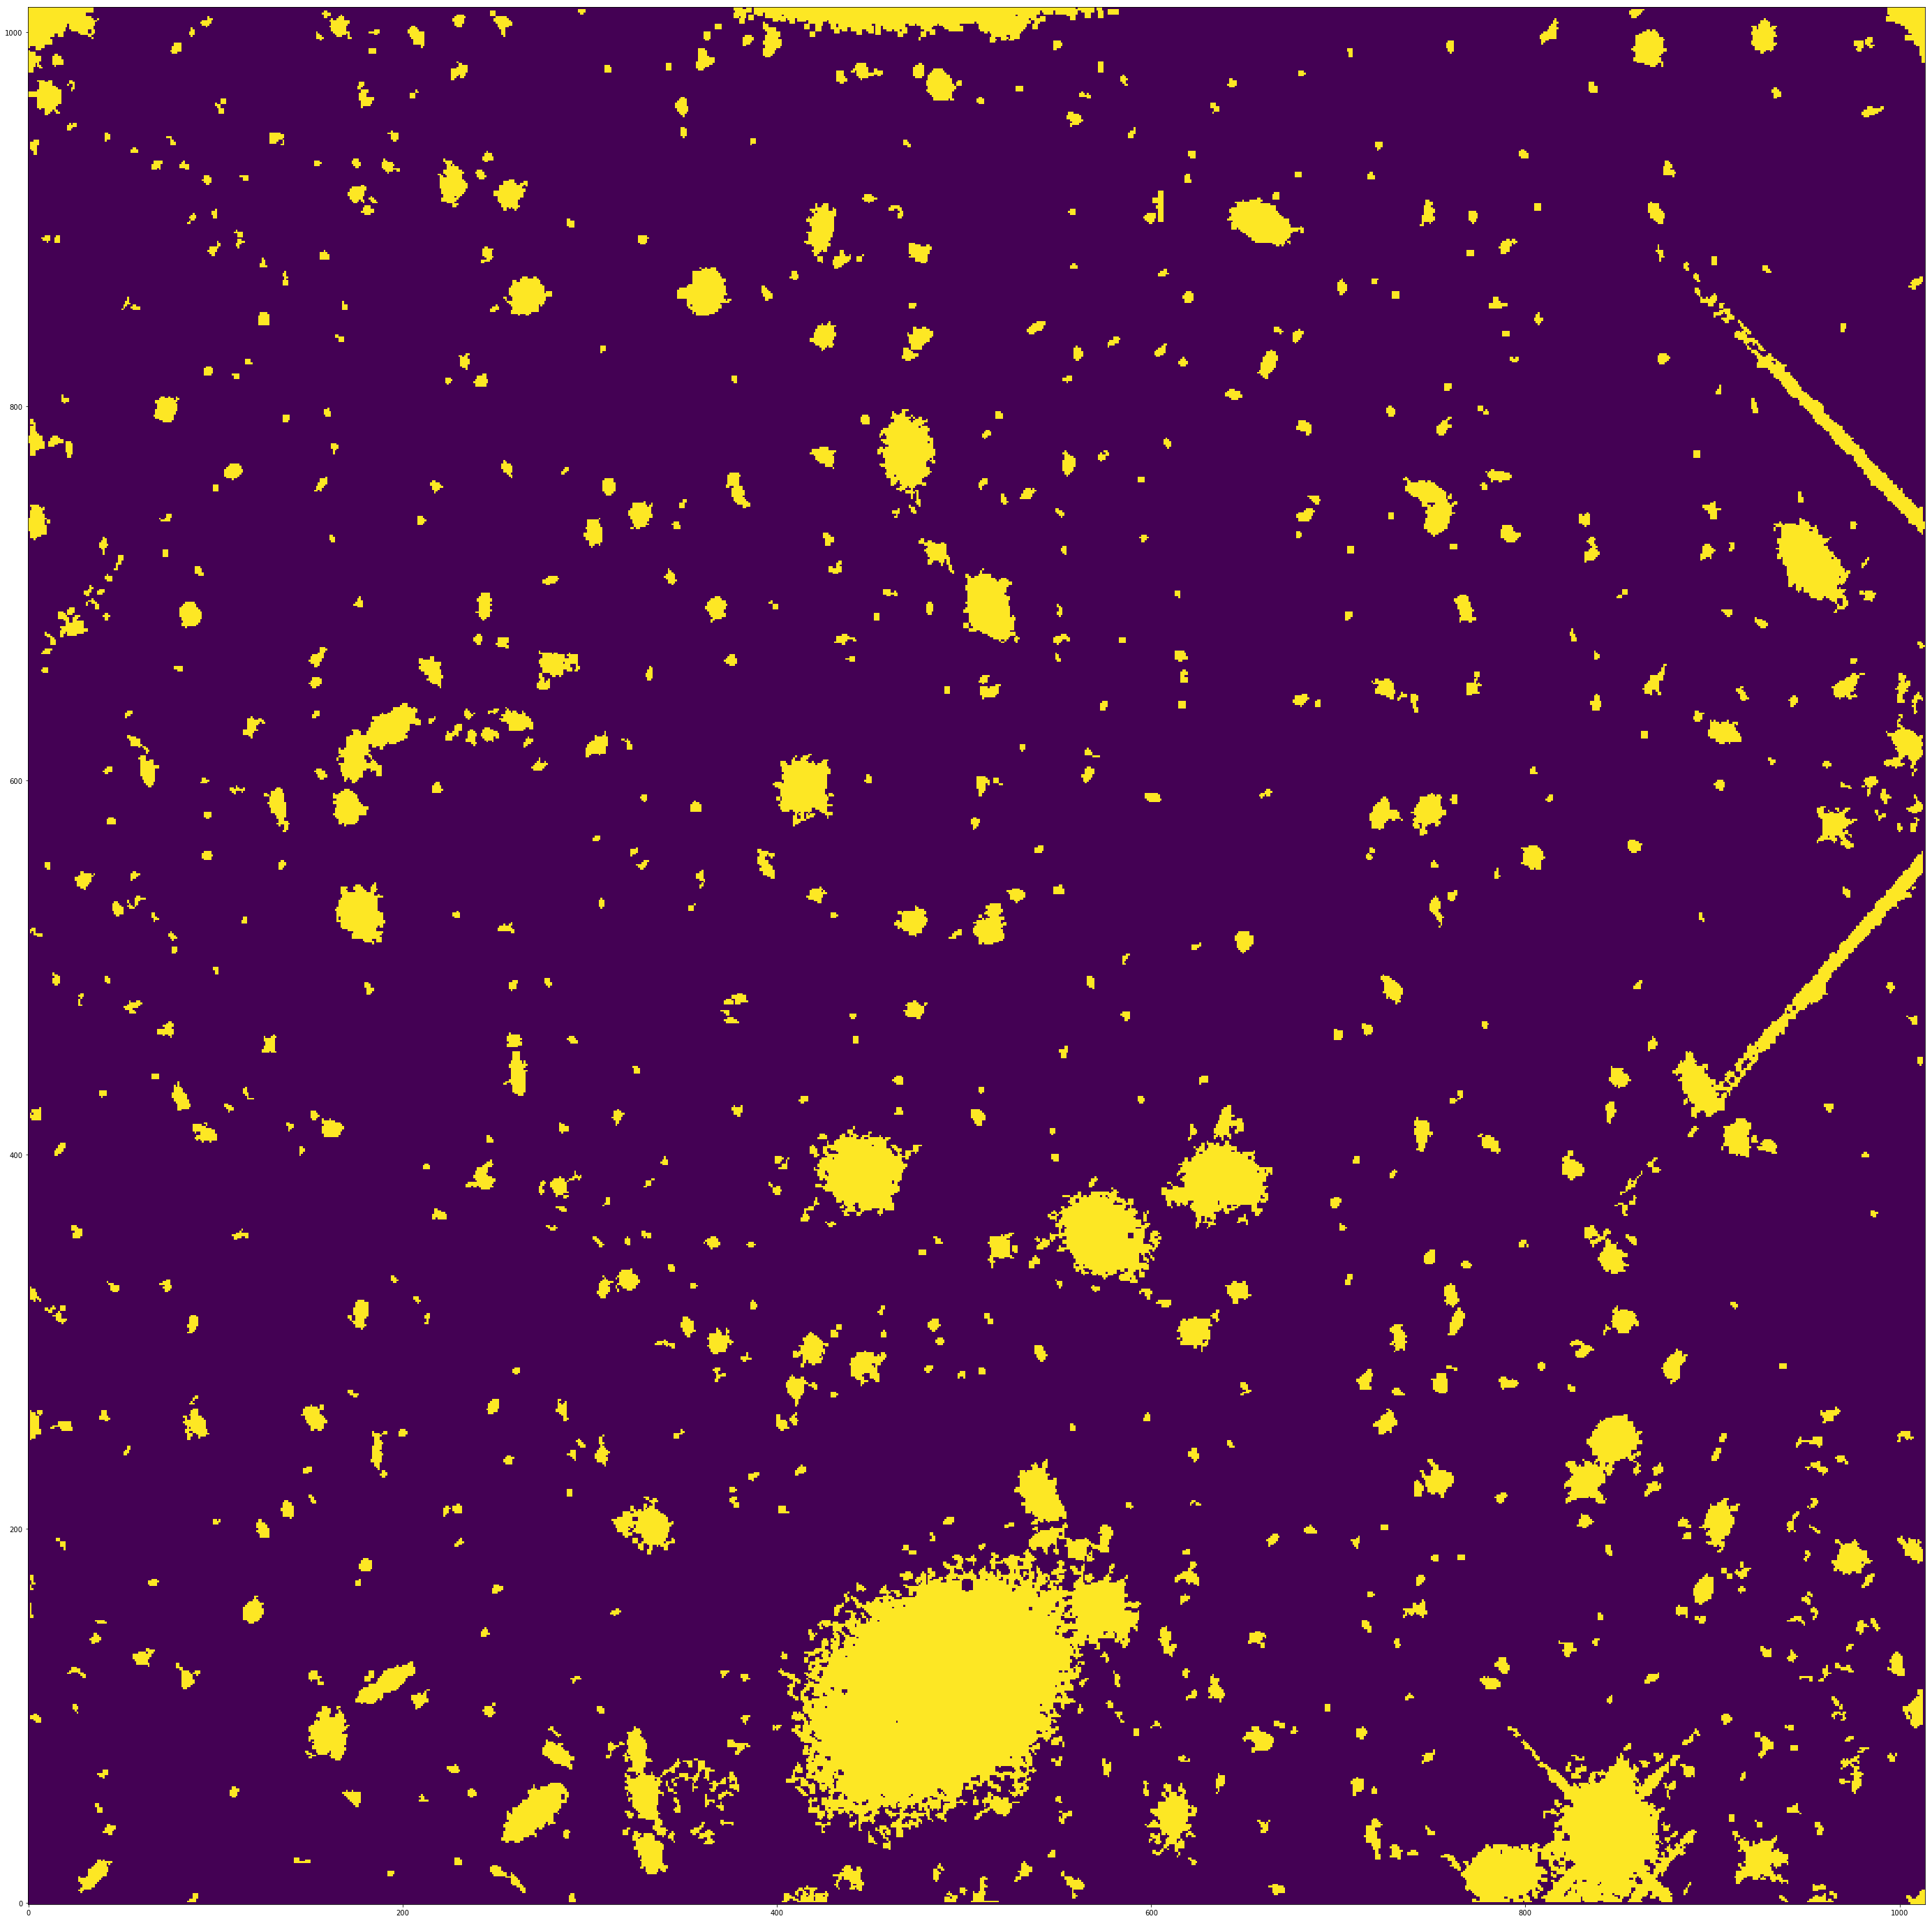

In [18]:
%matplotlib inline
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504f9q_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')#,cmap=seg.cmap(random_state=12345))# cmap='Greys_r', norm=norm)
#ax2.imshow(segm_con, origin='lower', cmap=segm.cmap(random_state=12345))

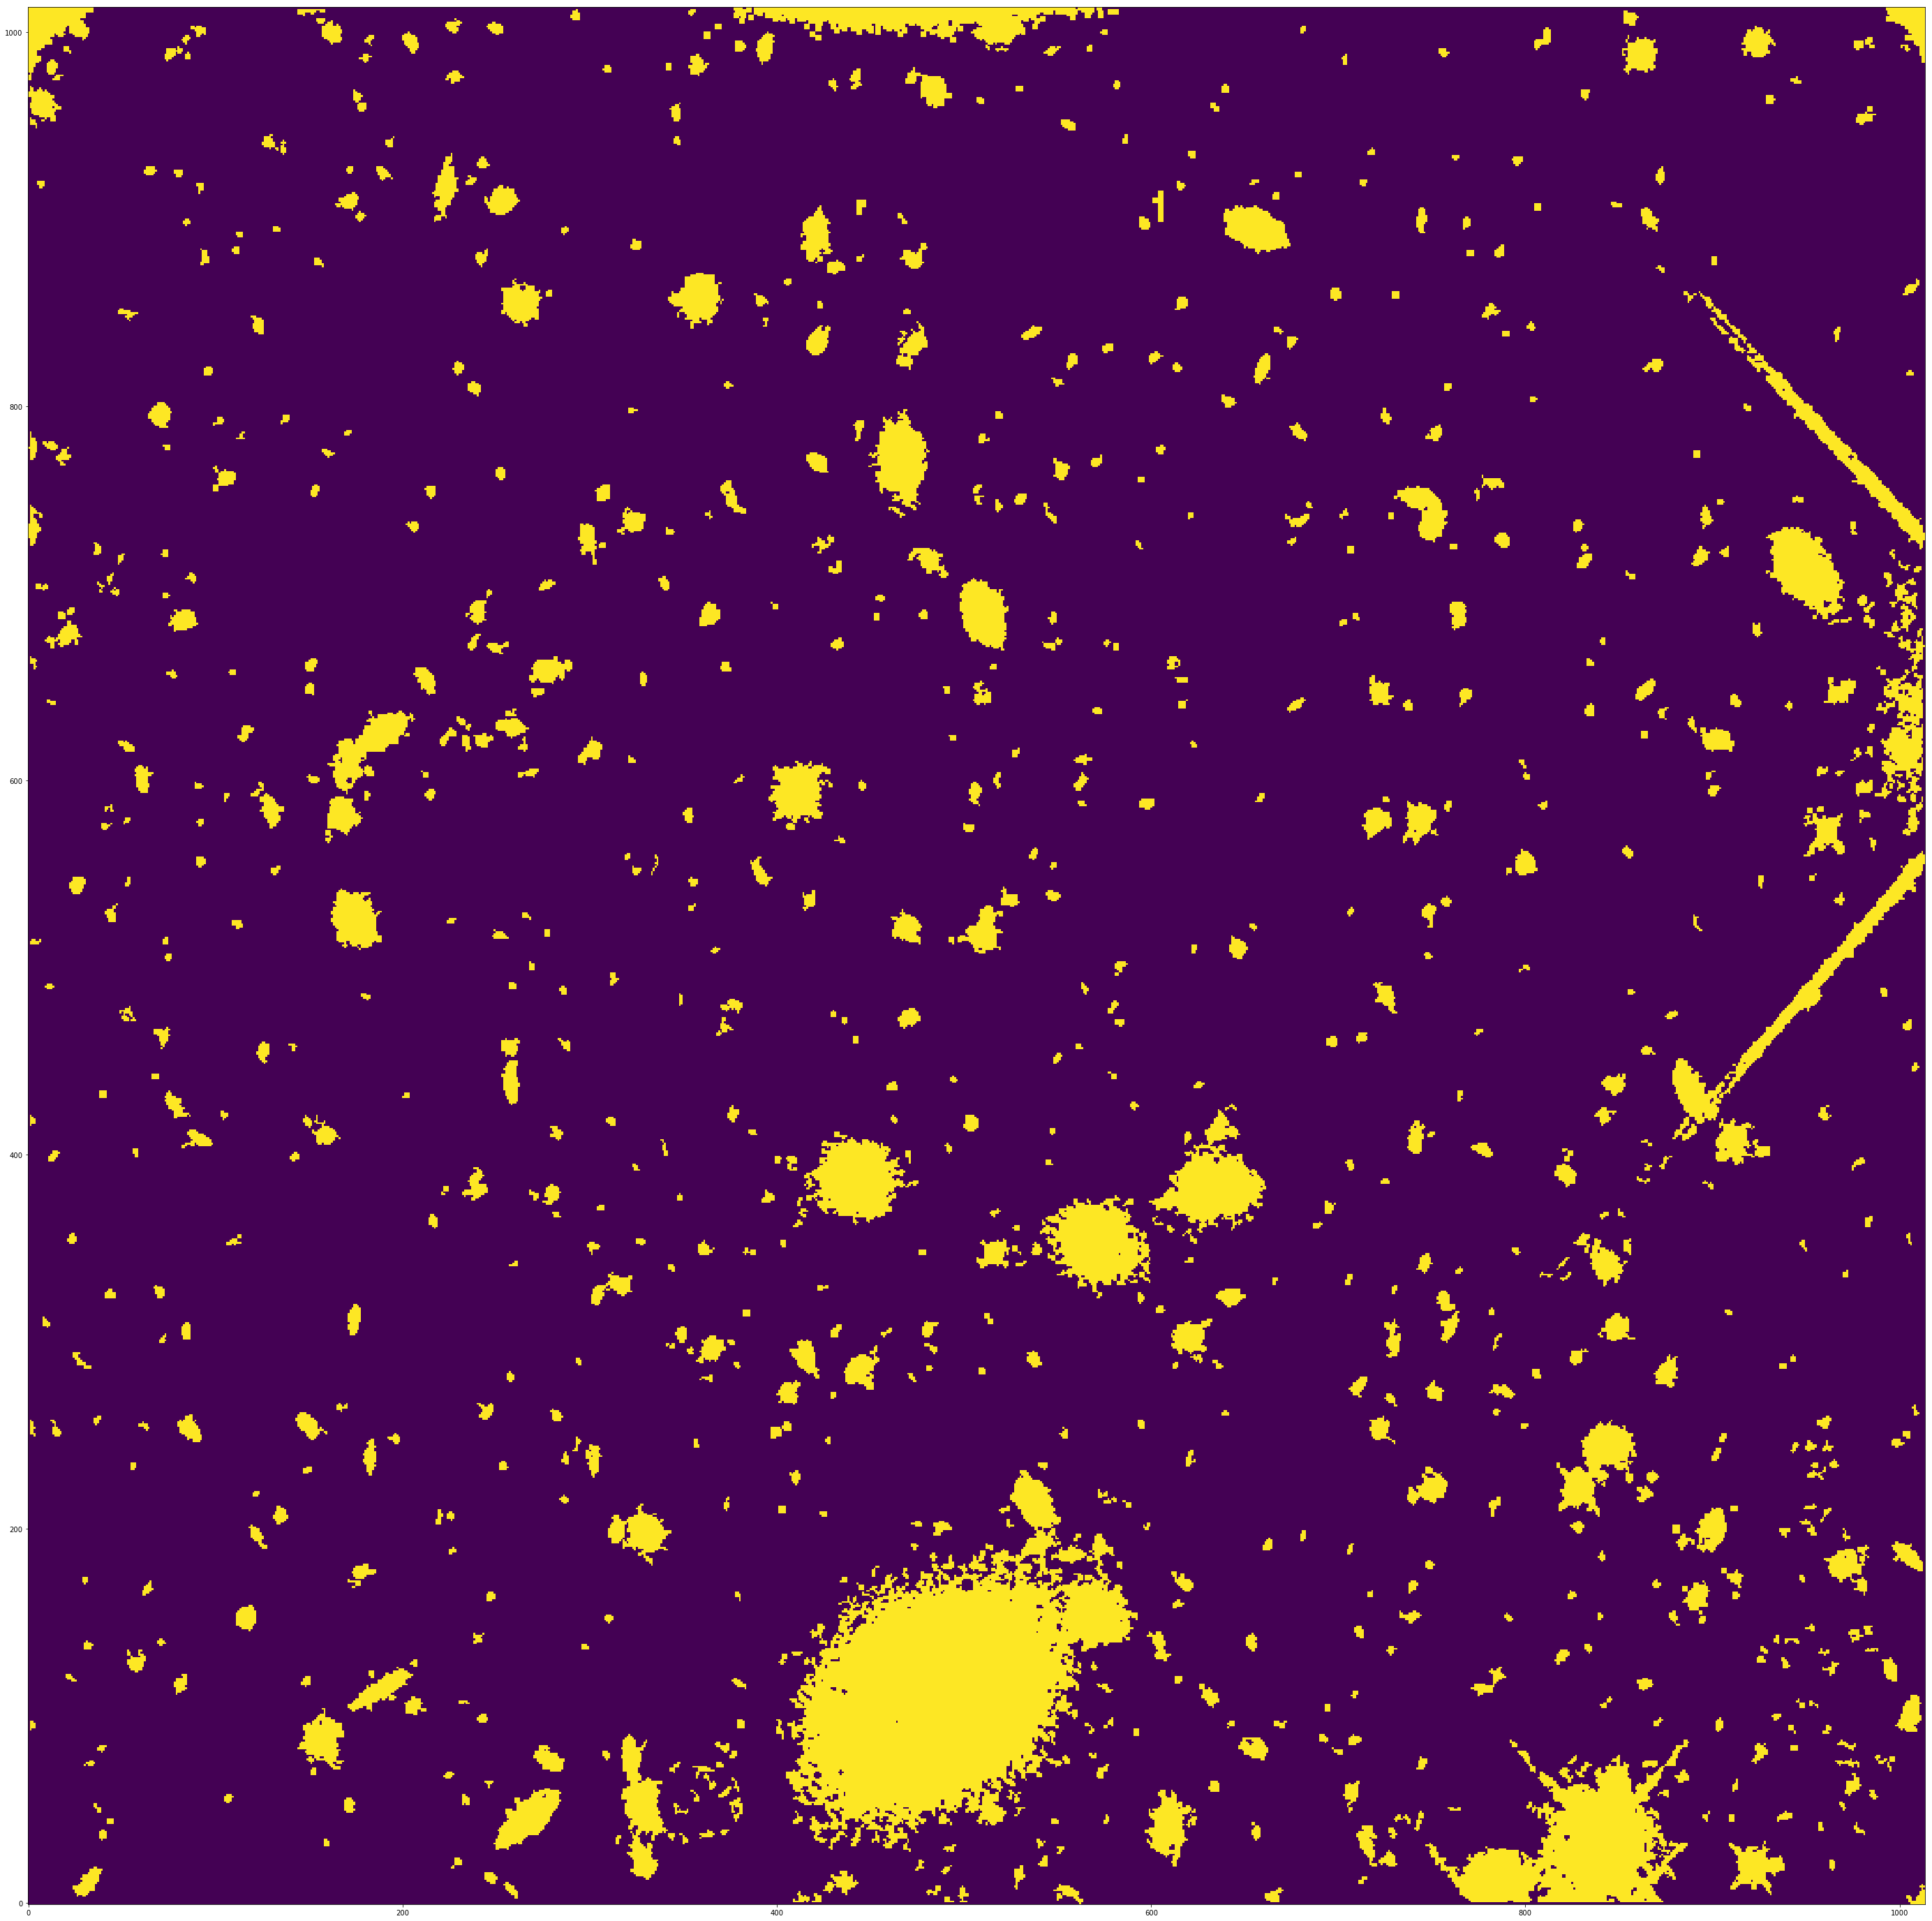

In [19]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504enq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

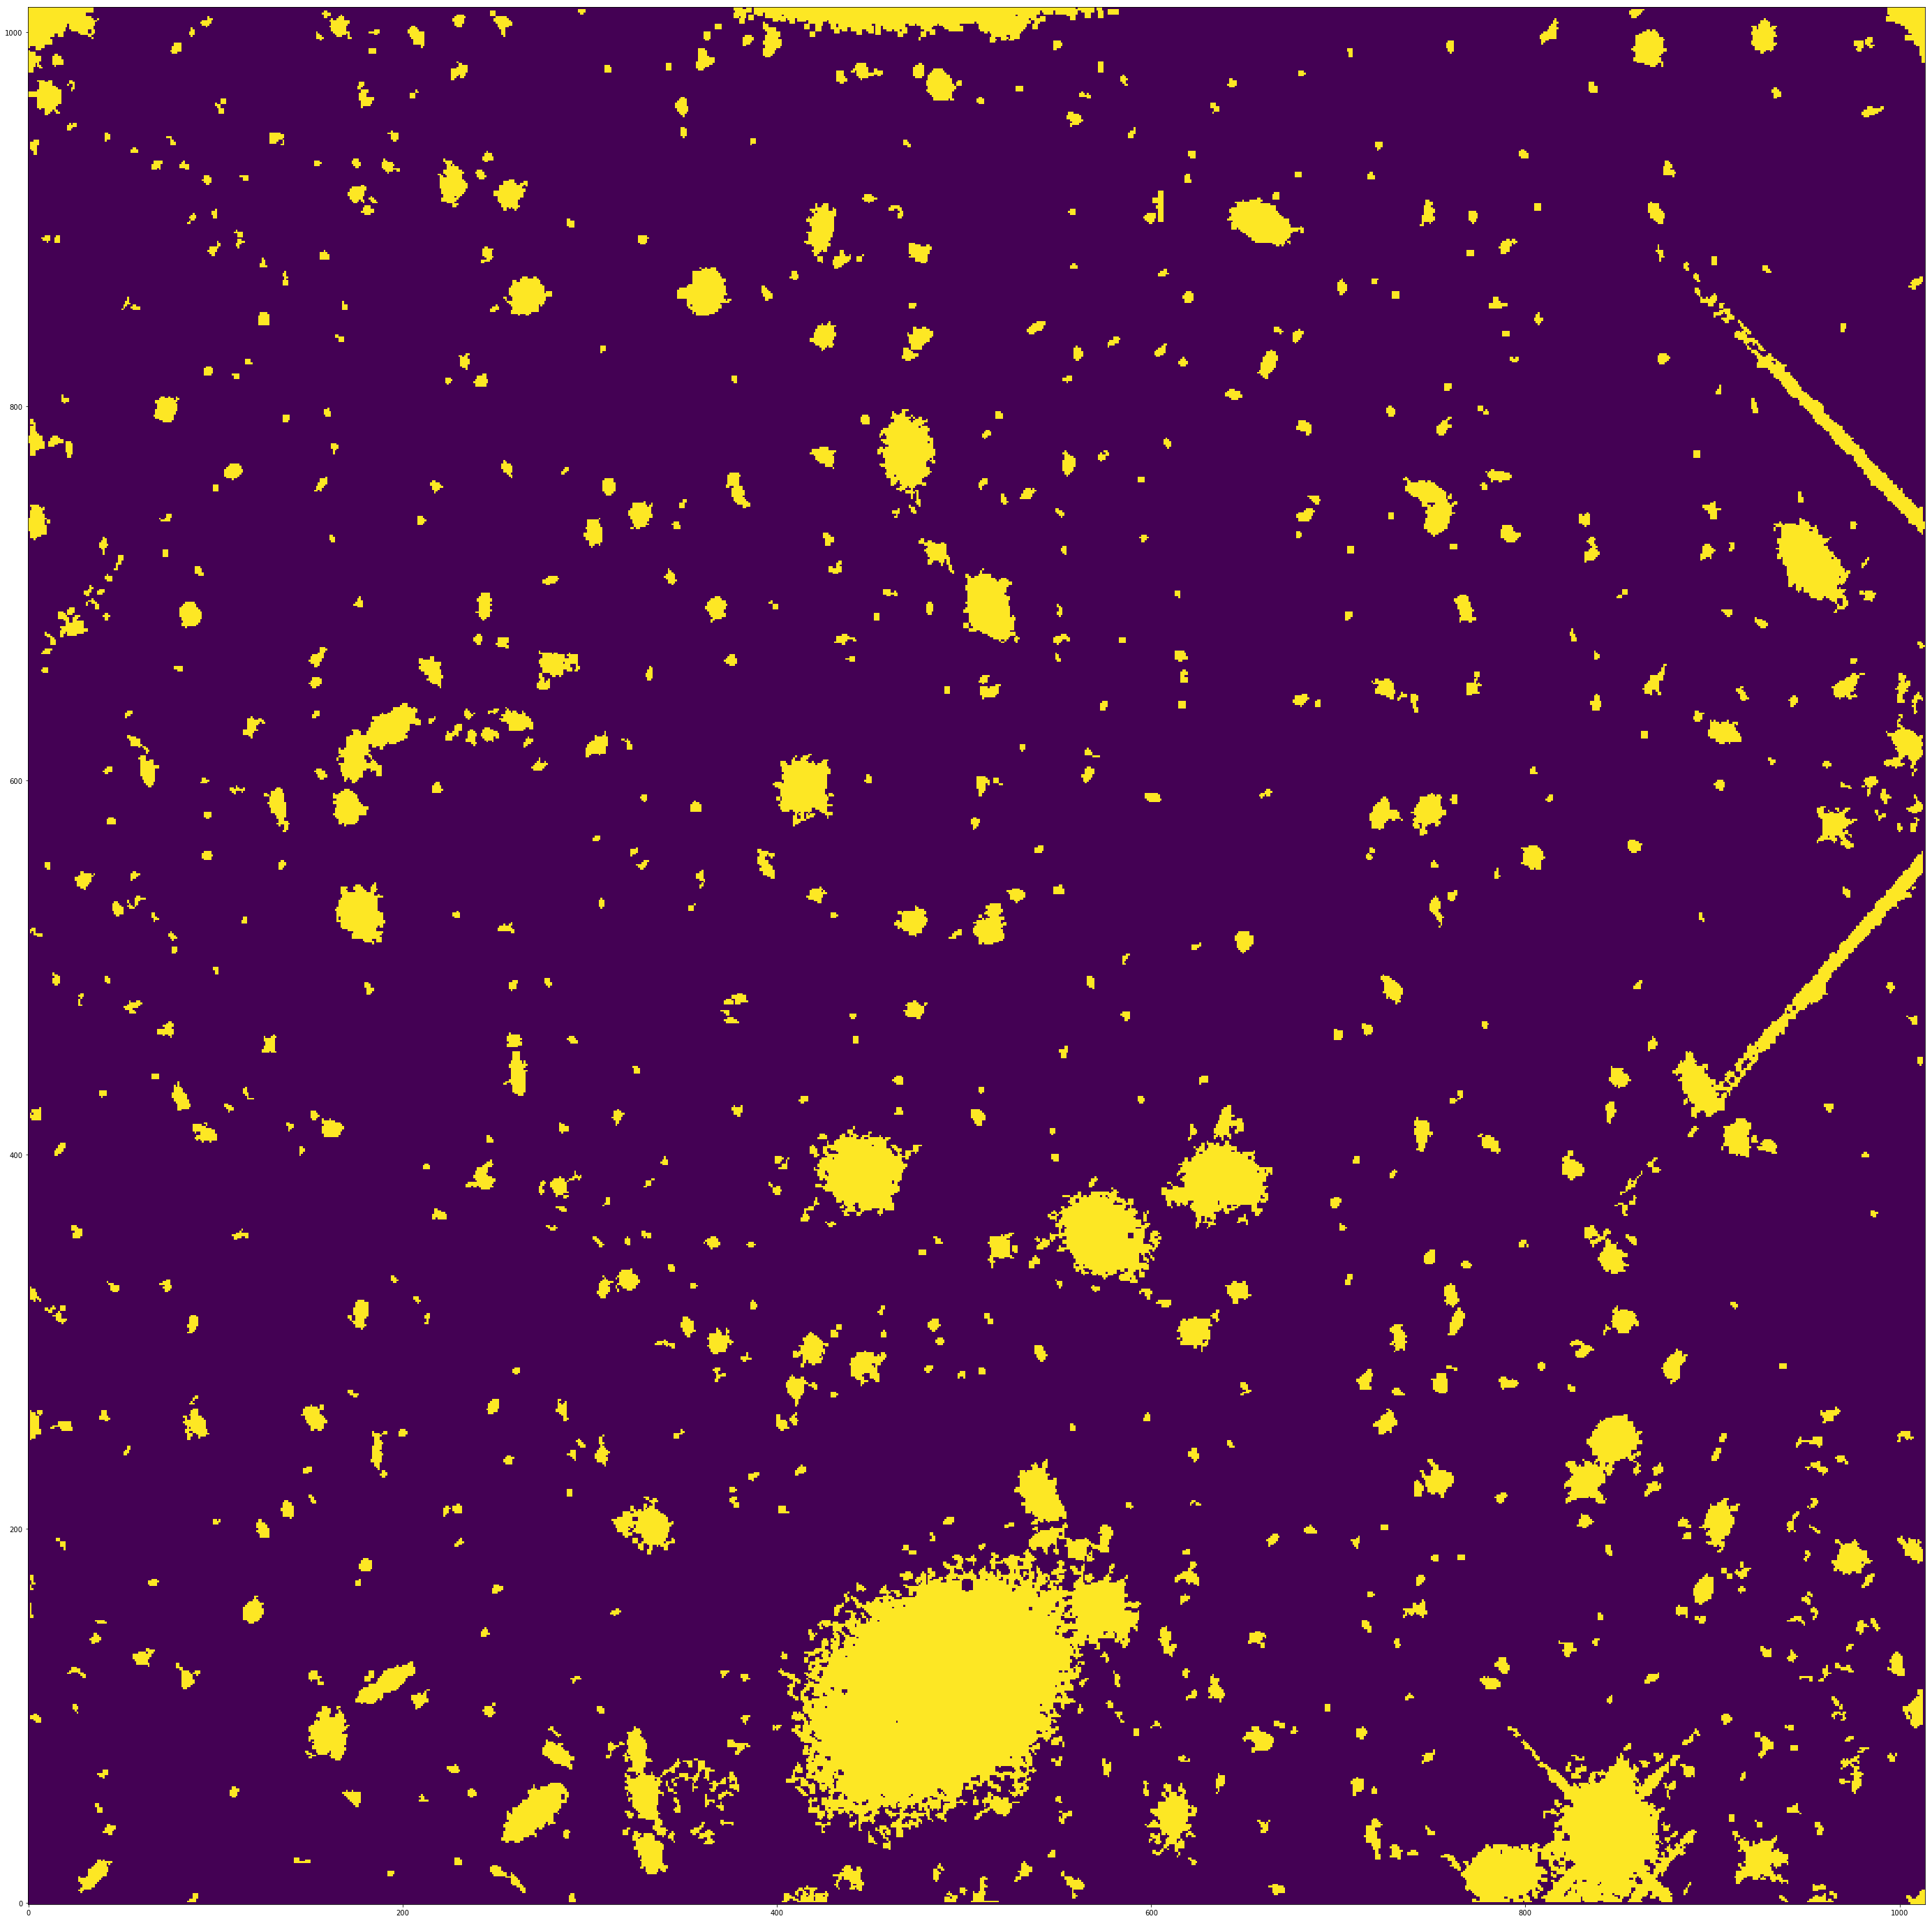

In [20]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504f9q_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

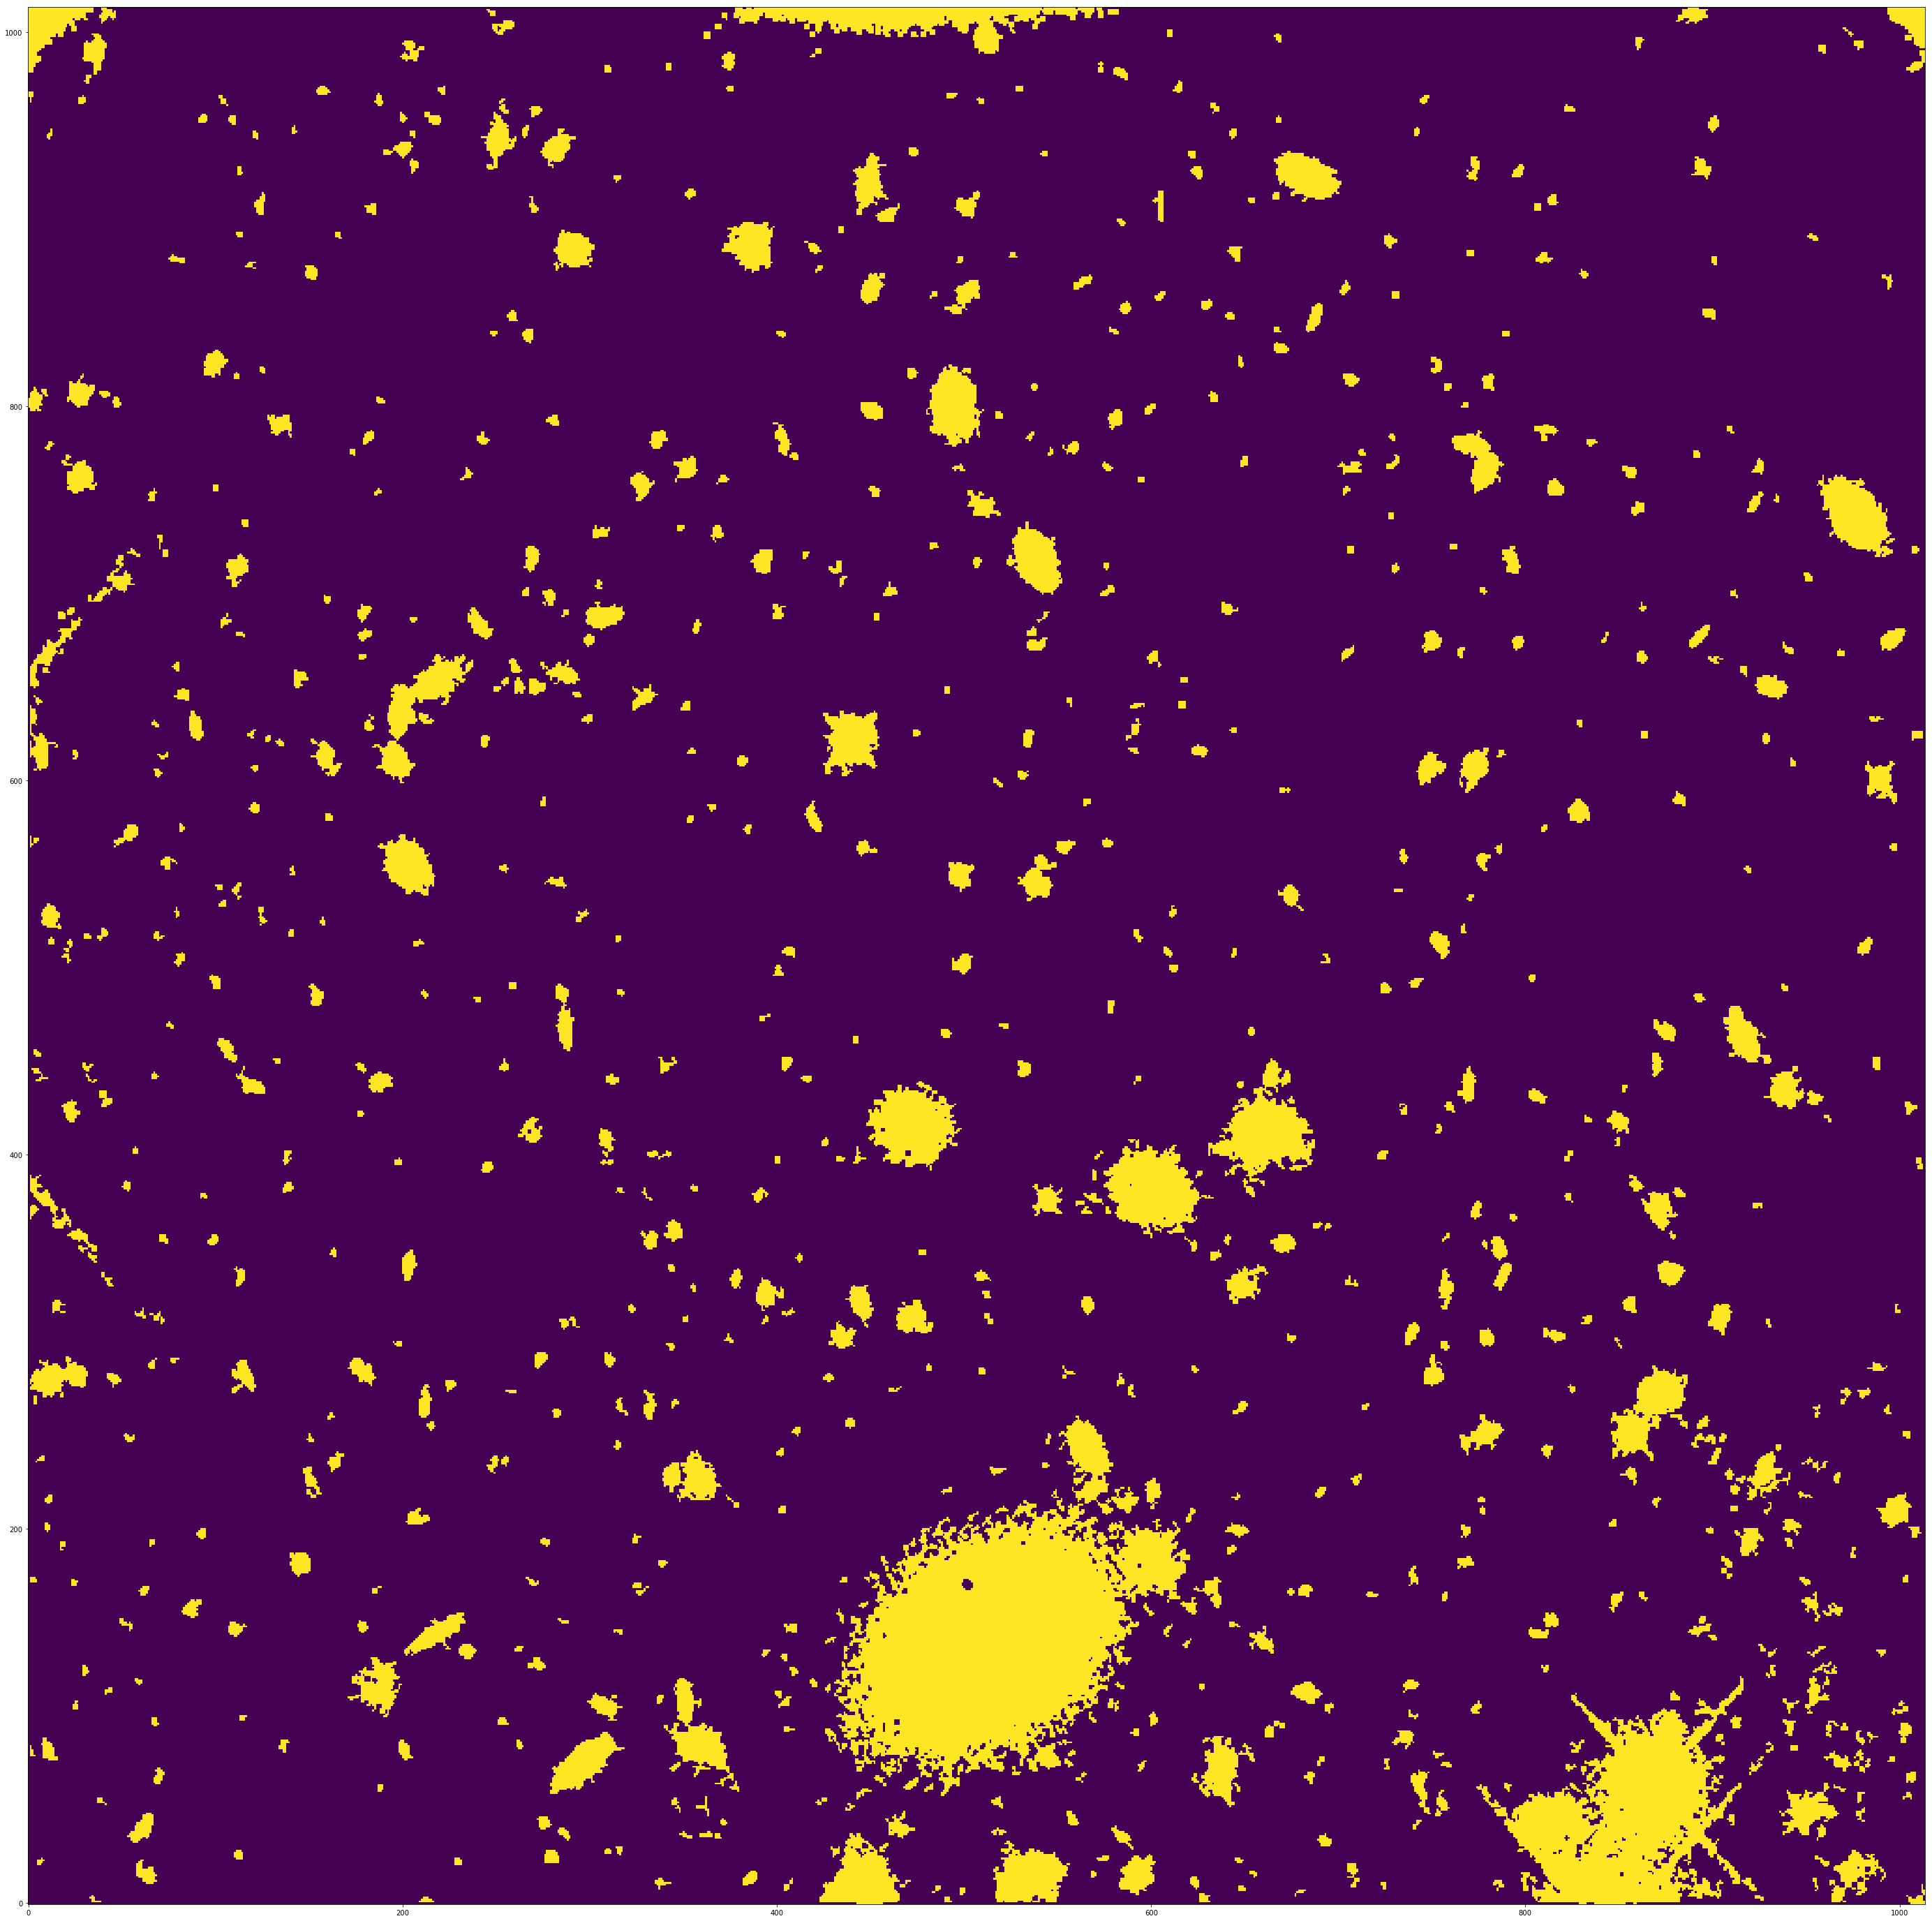

In [21]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504fcq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

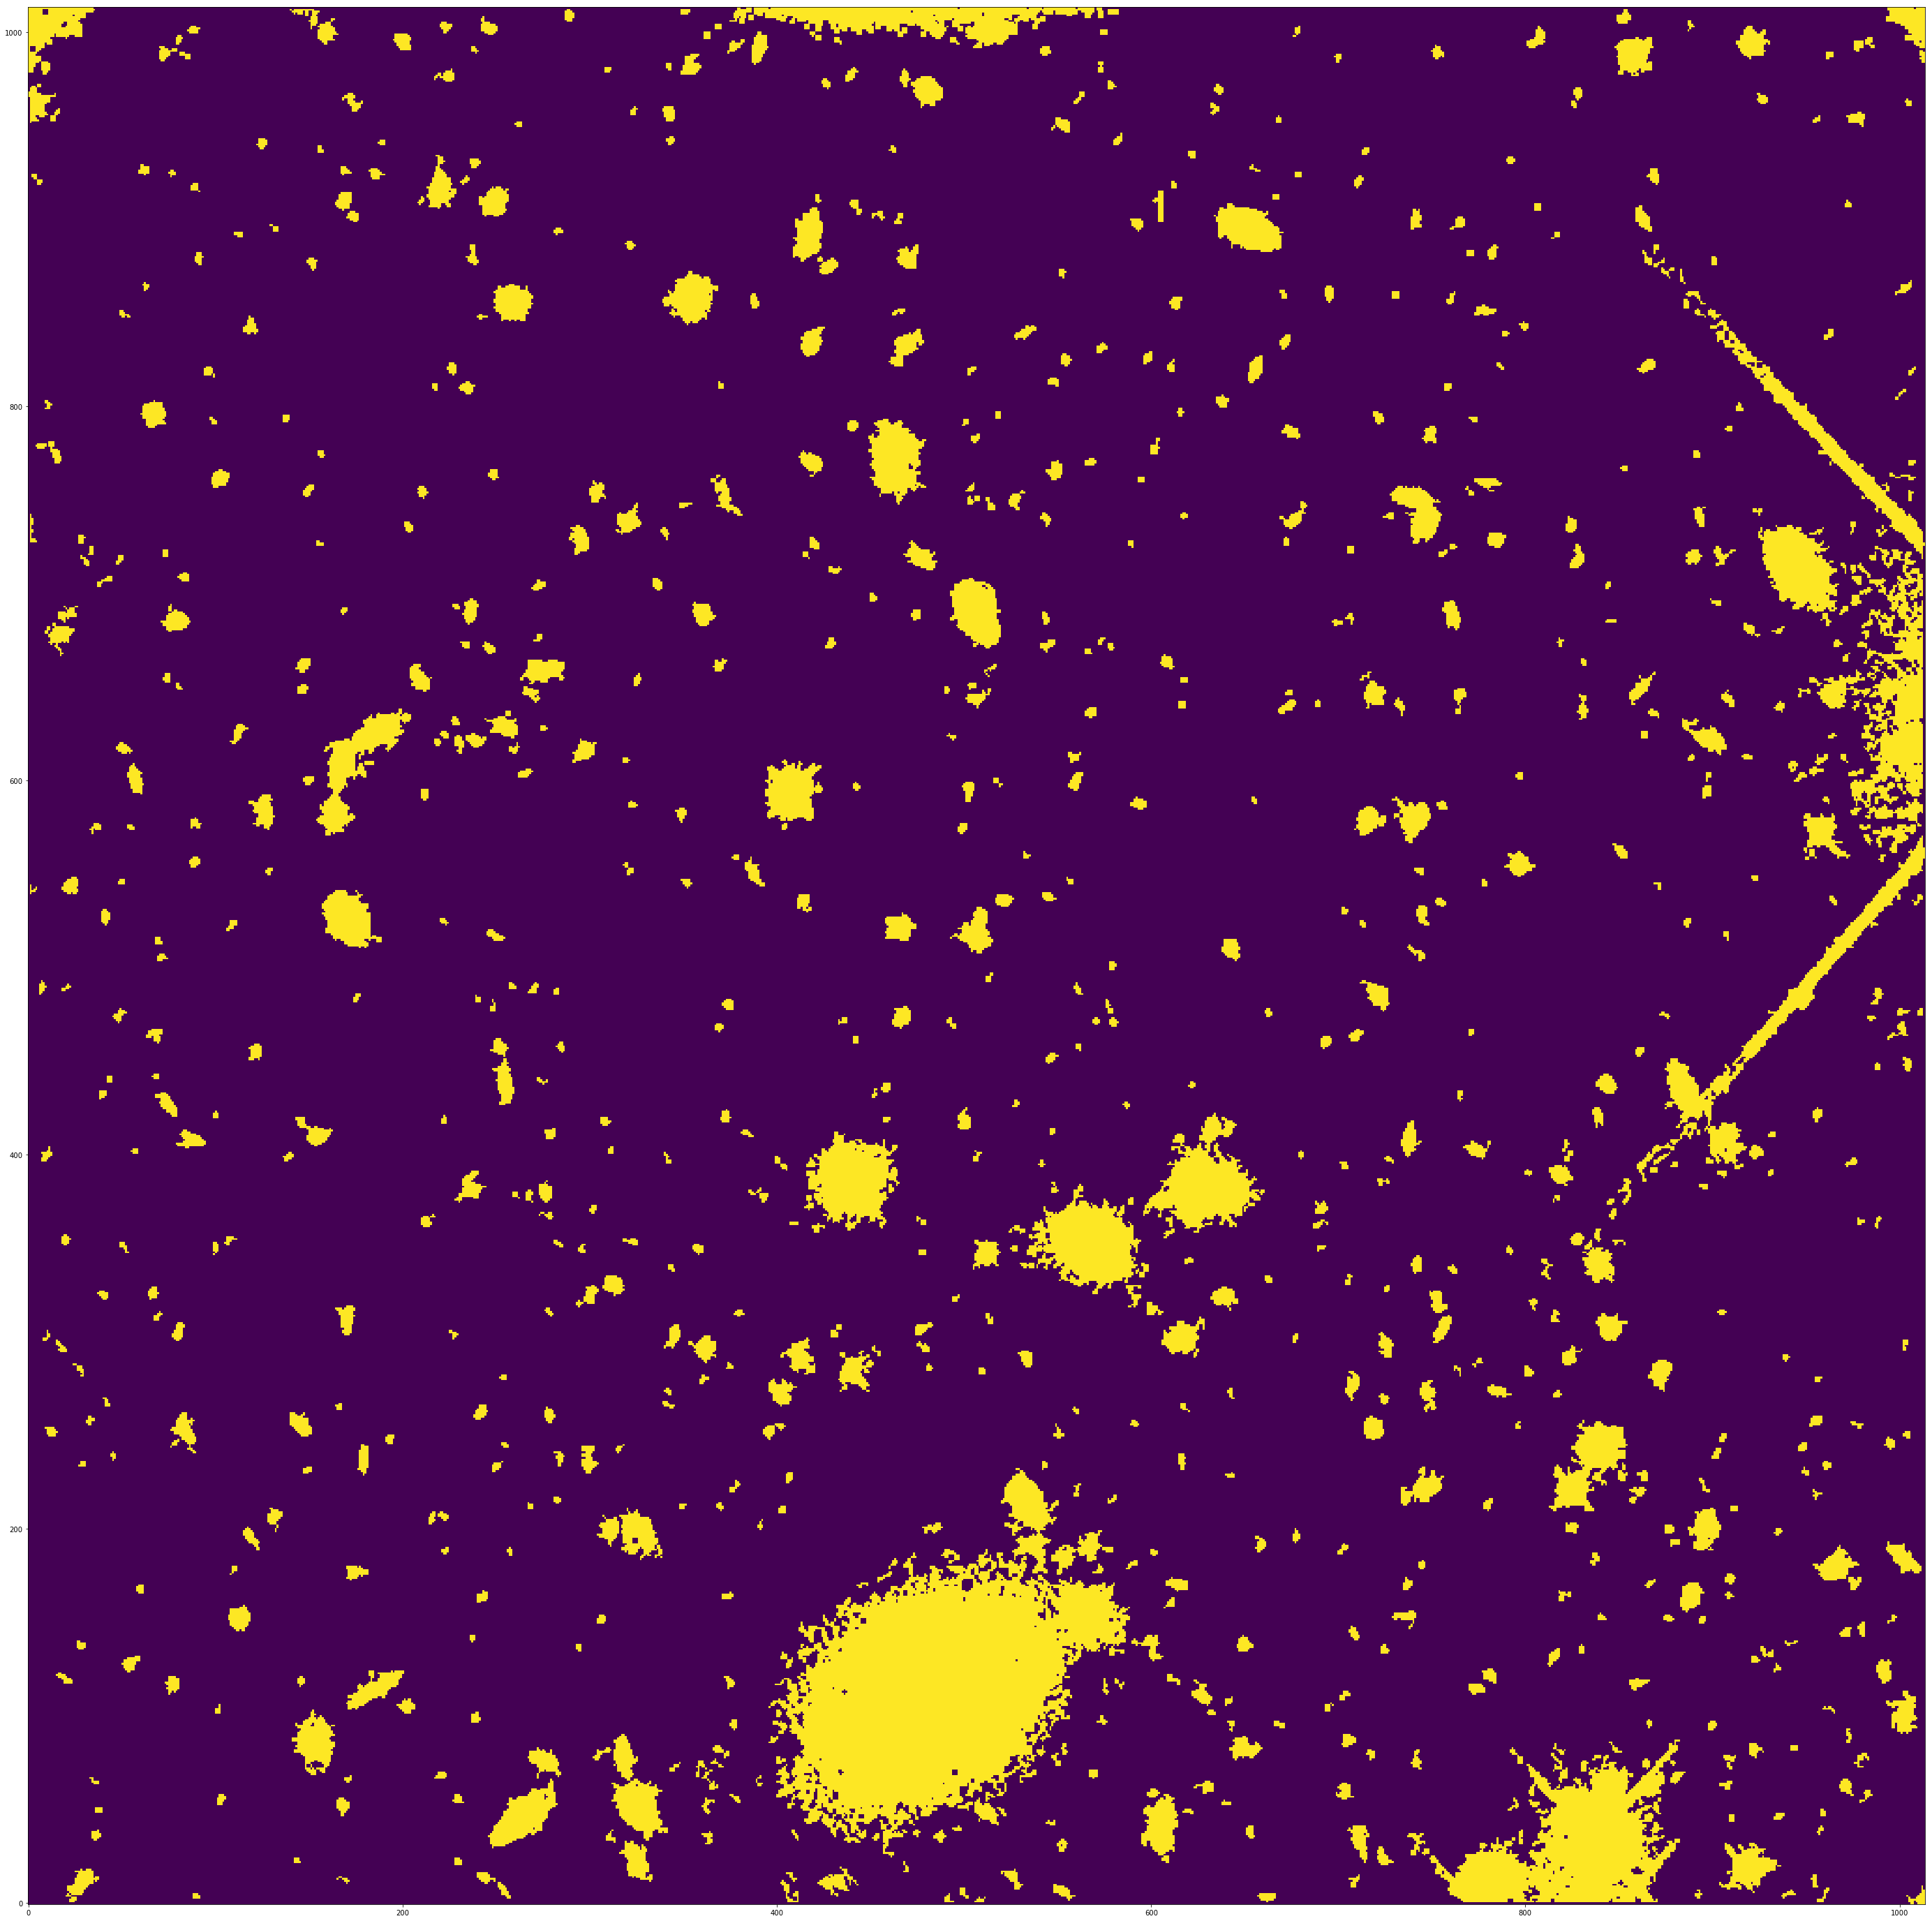

In [22]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504fhq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

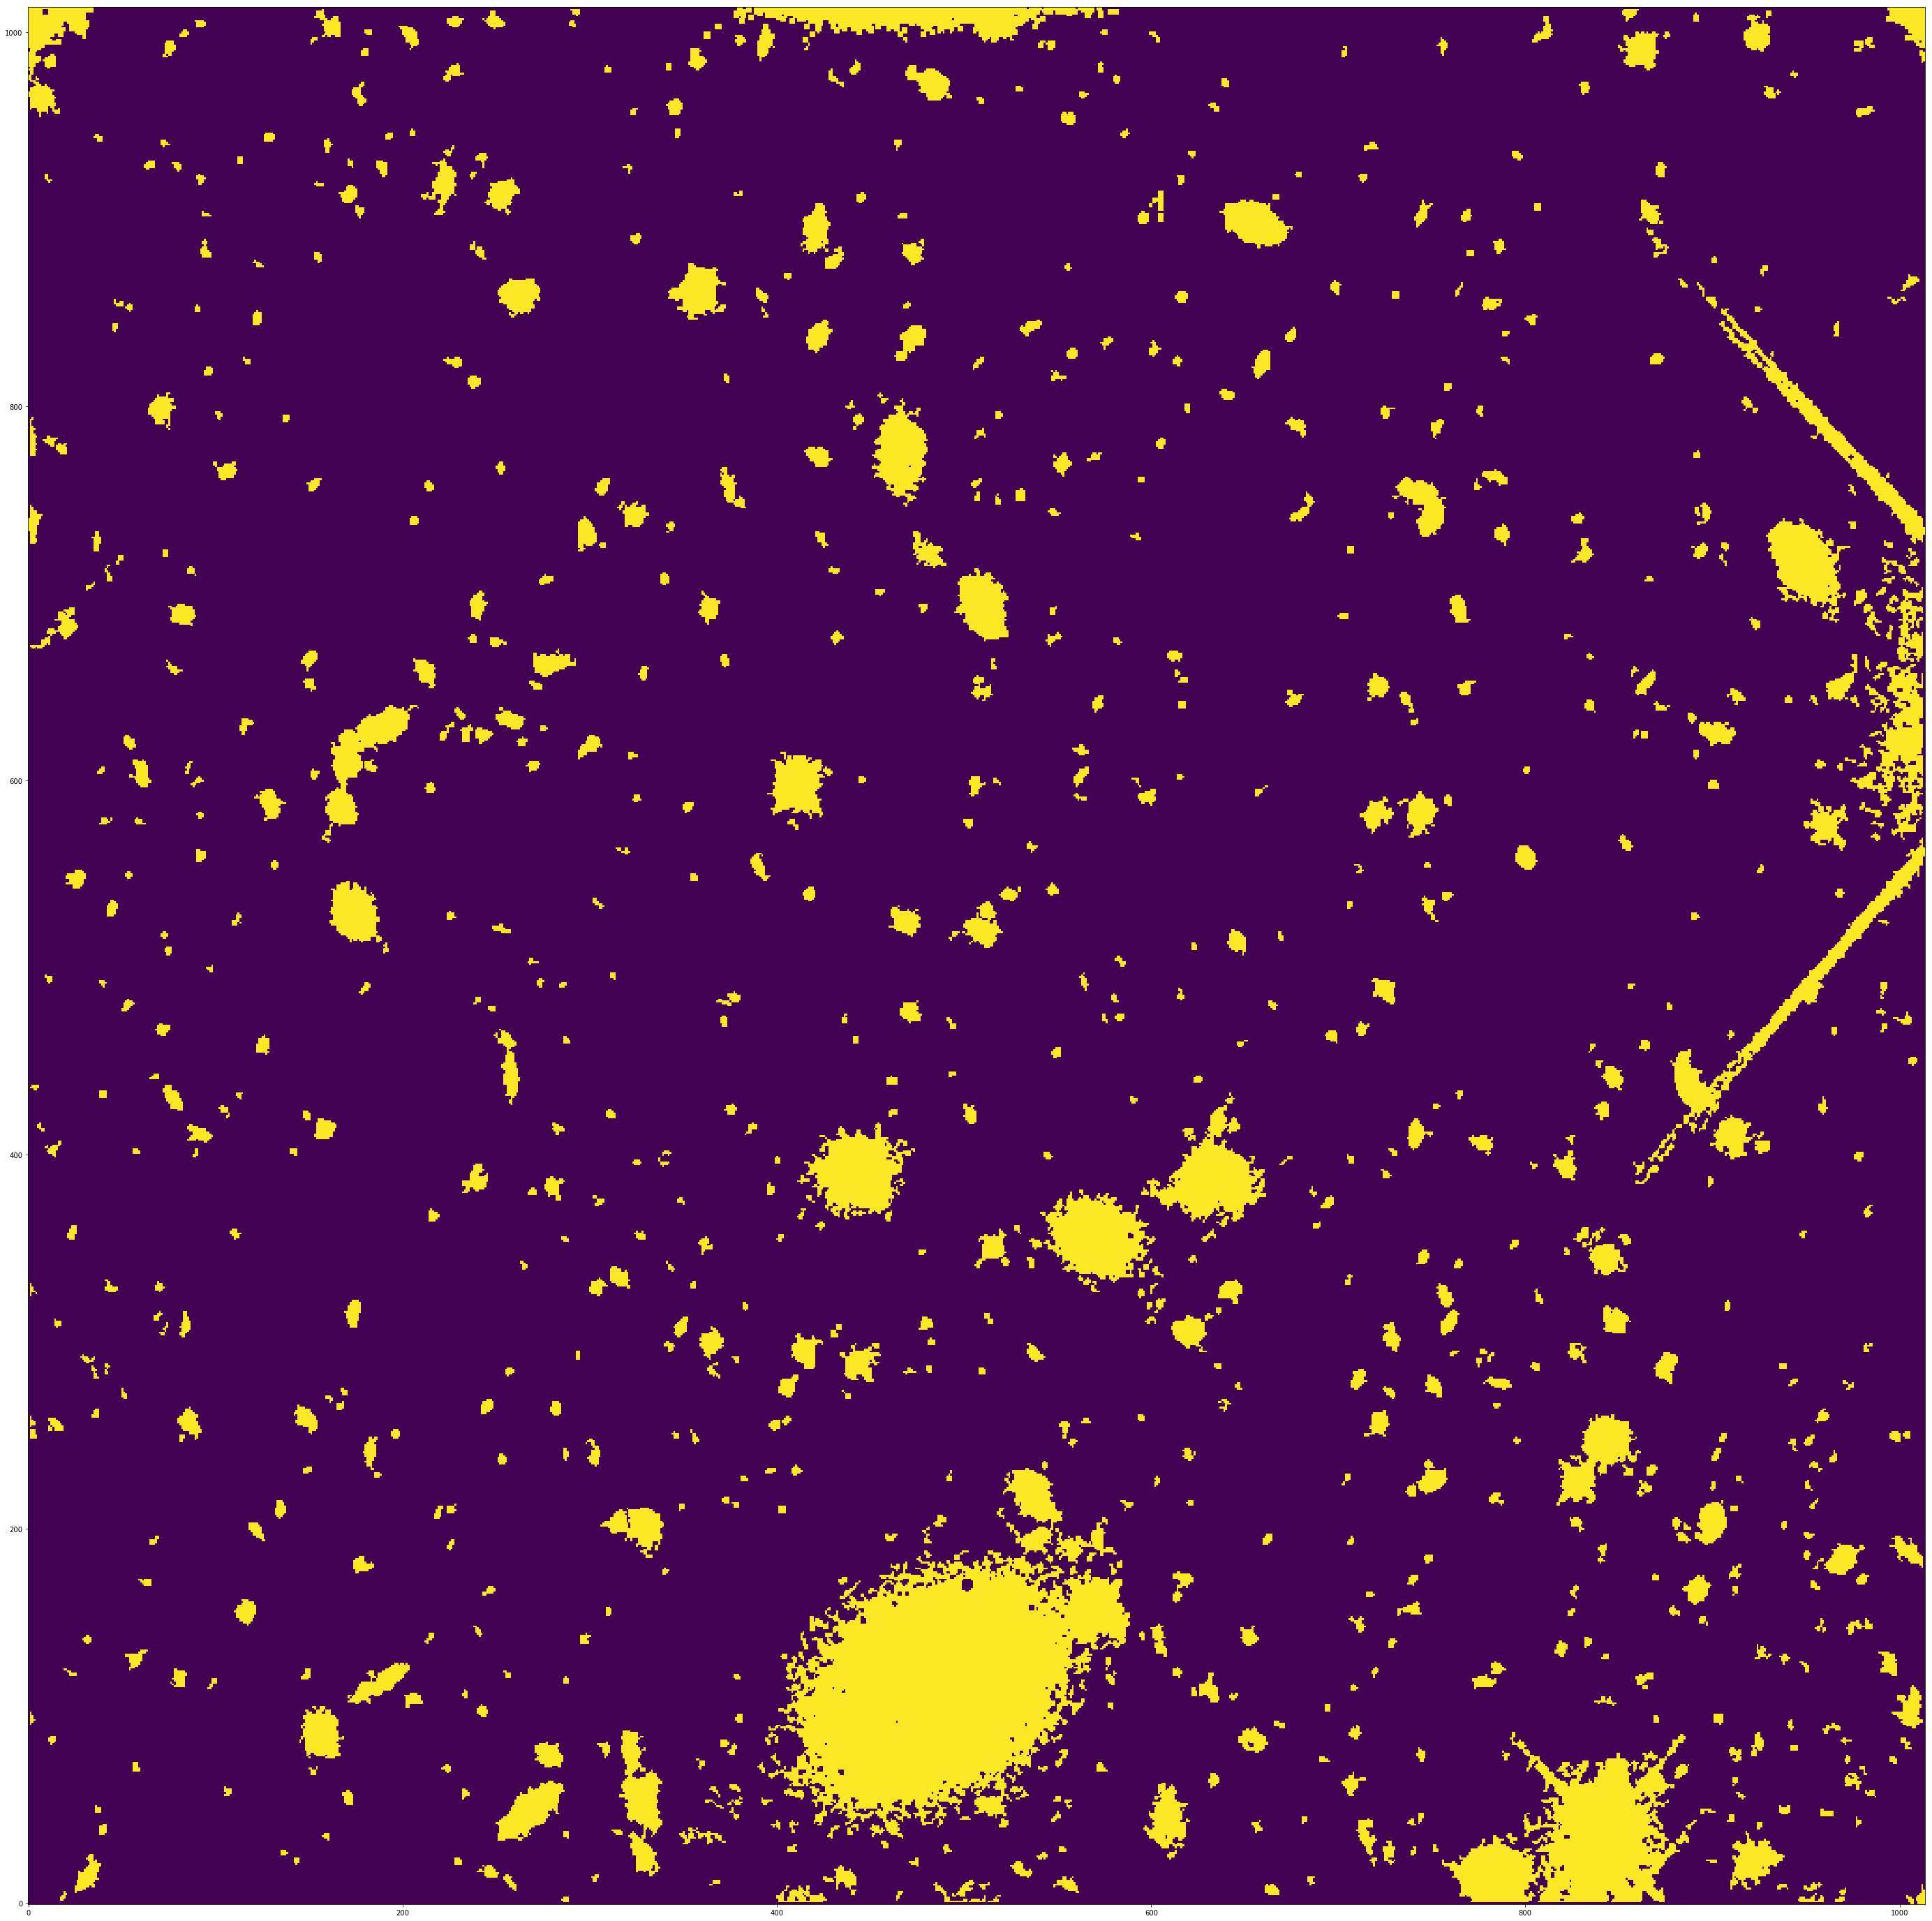

In [23]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504fjq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

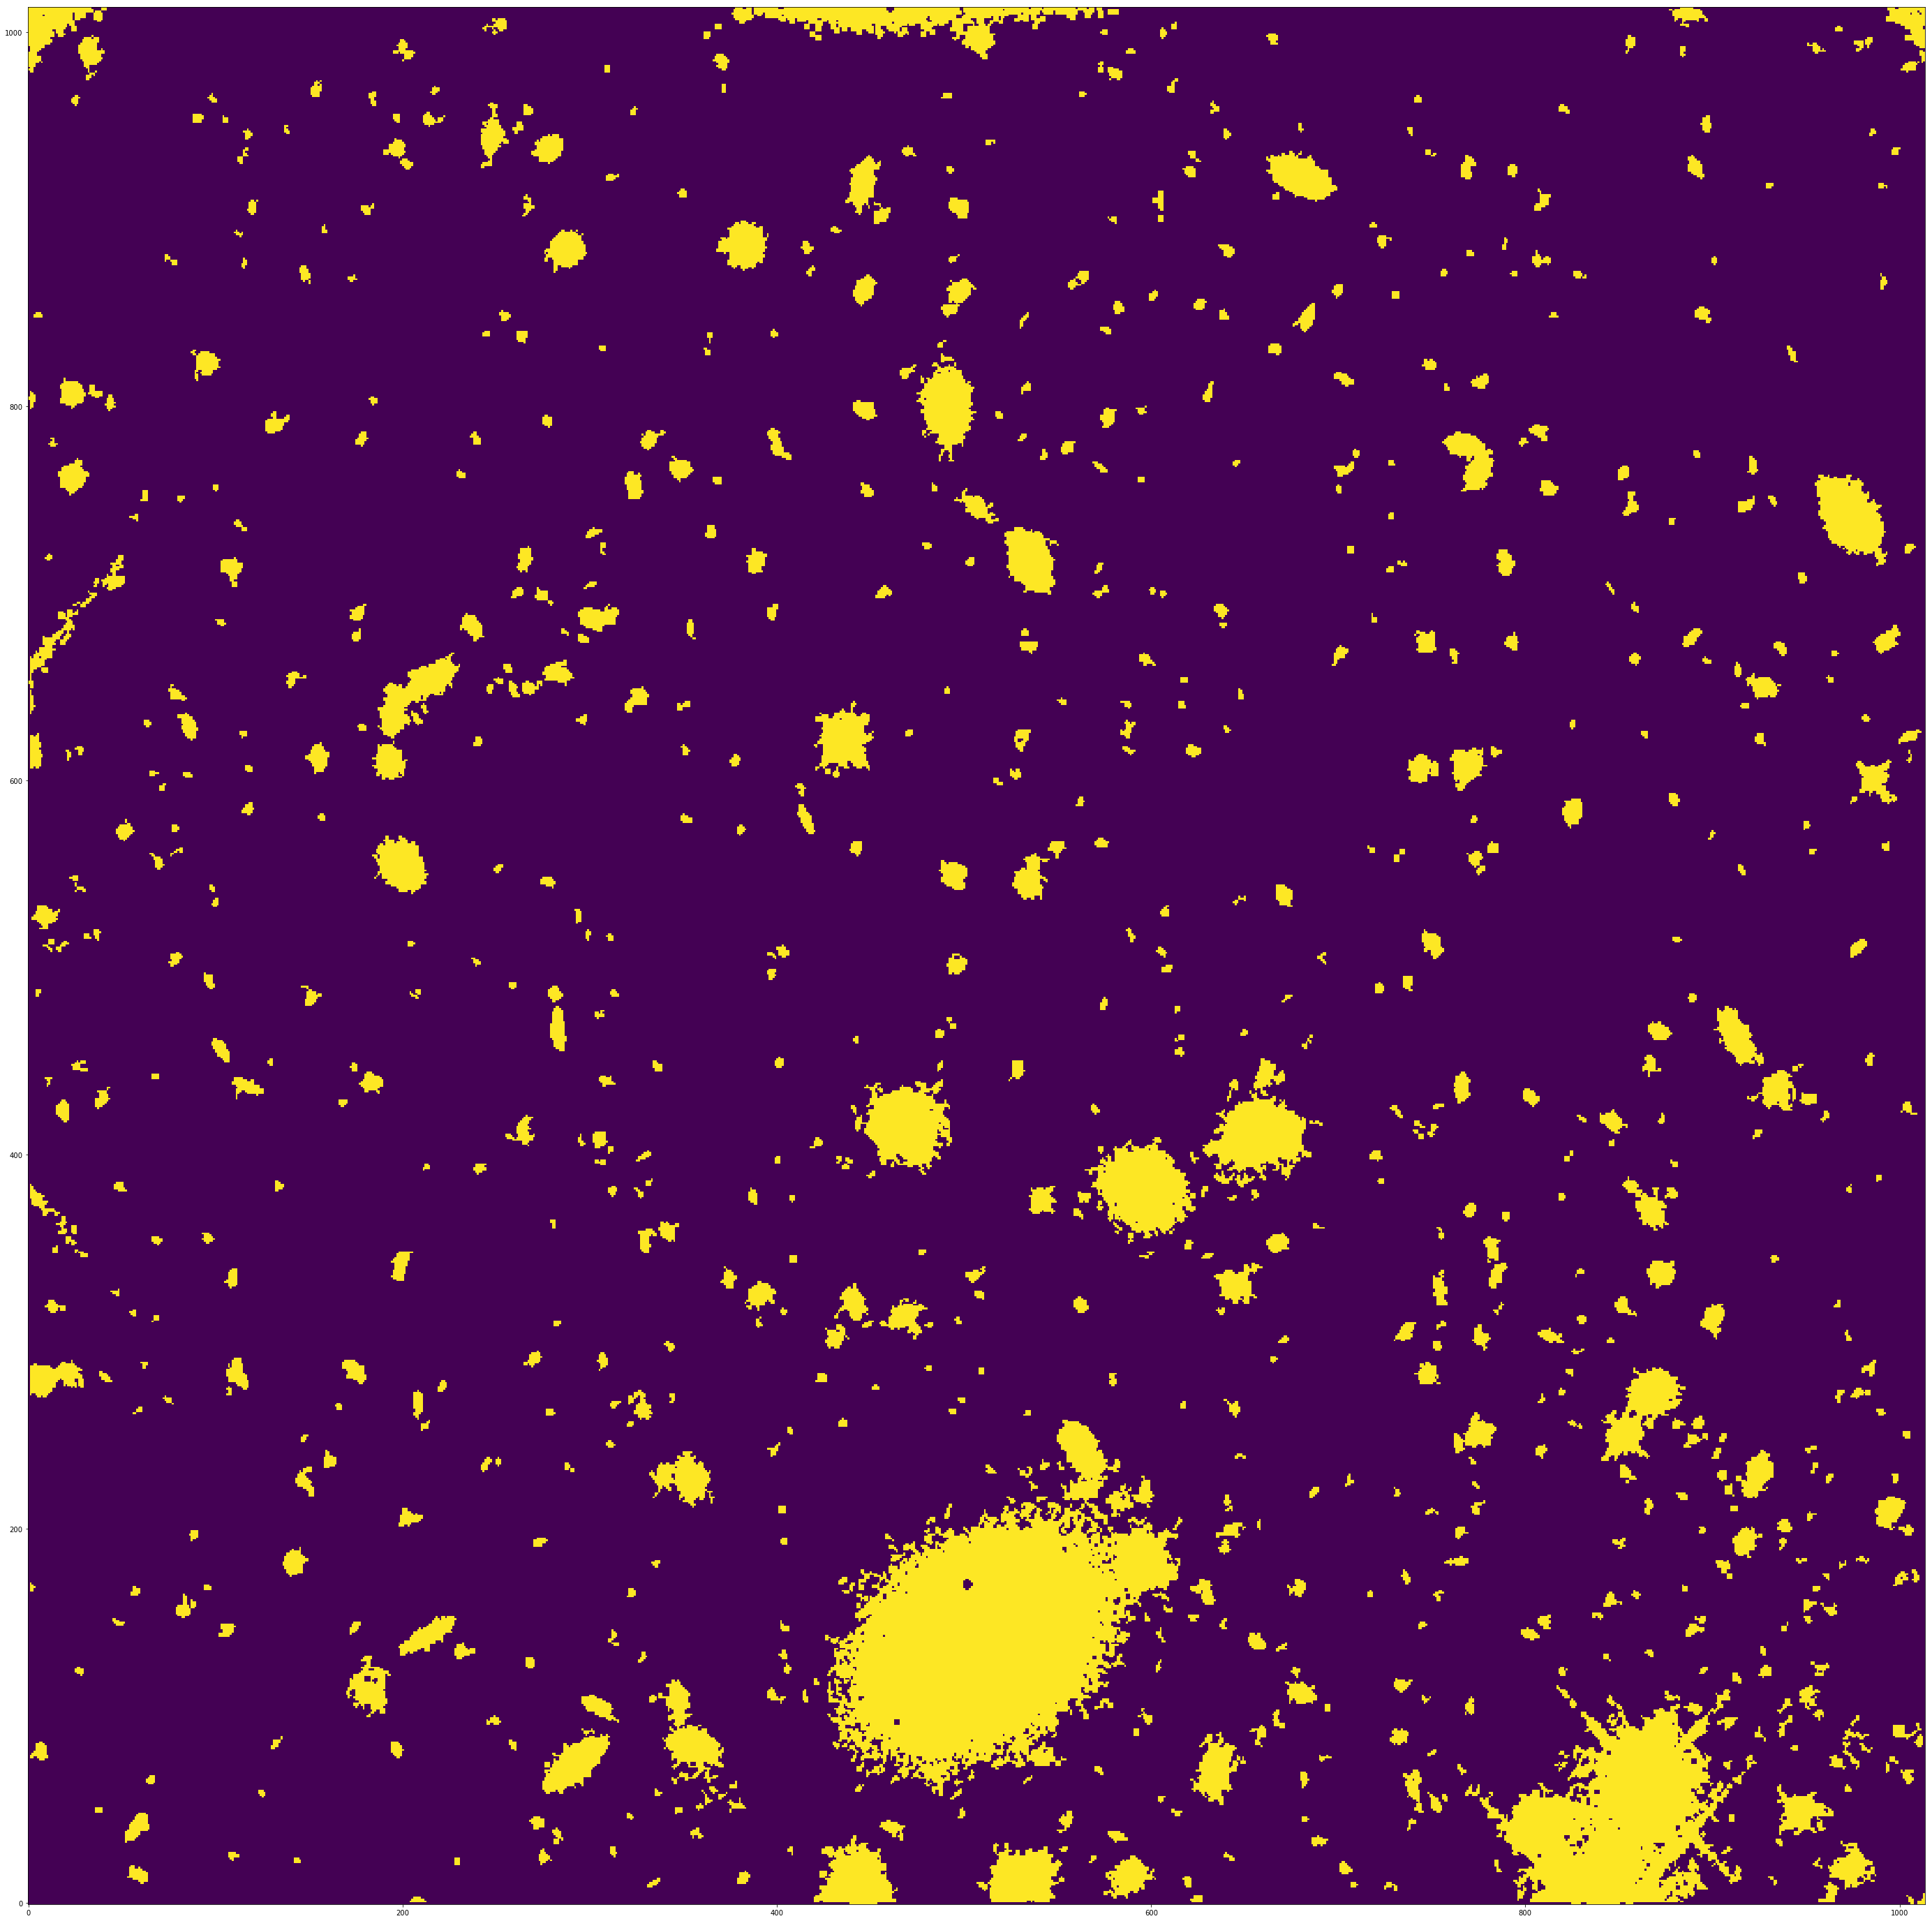

In [24]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504foq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

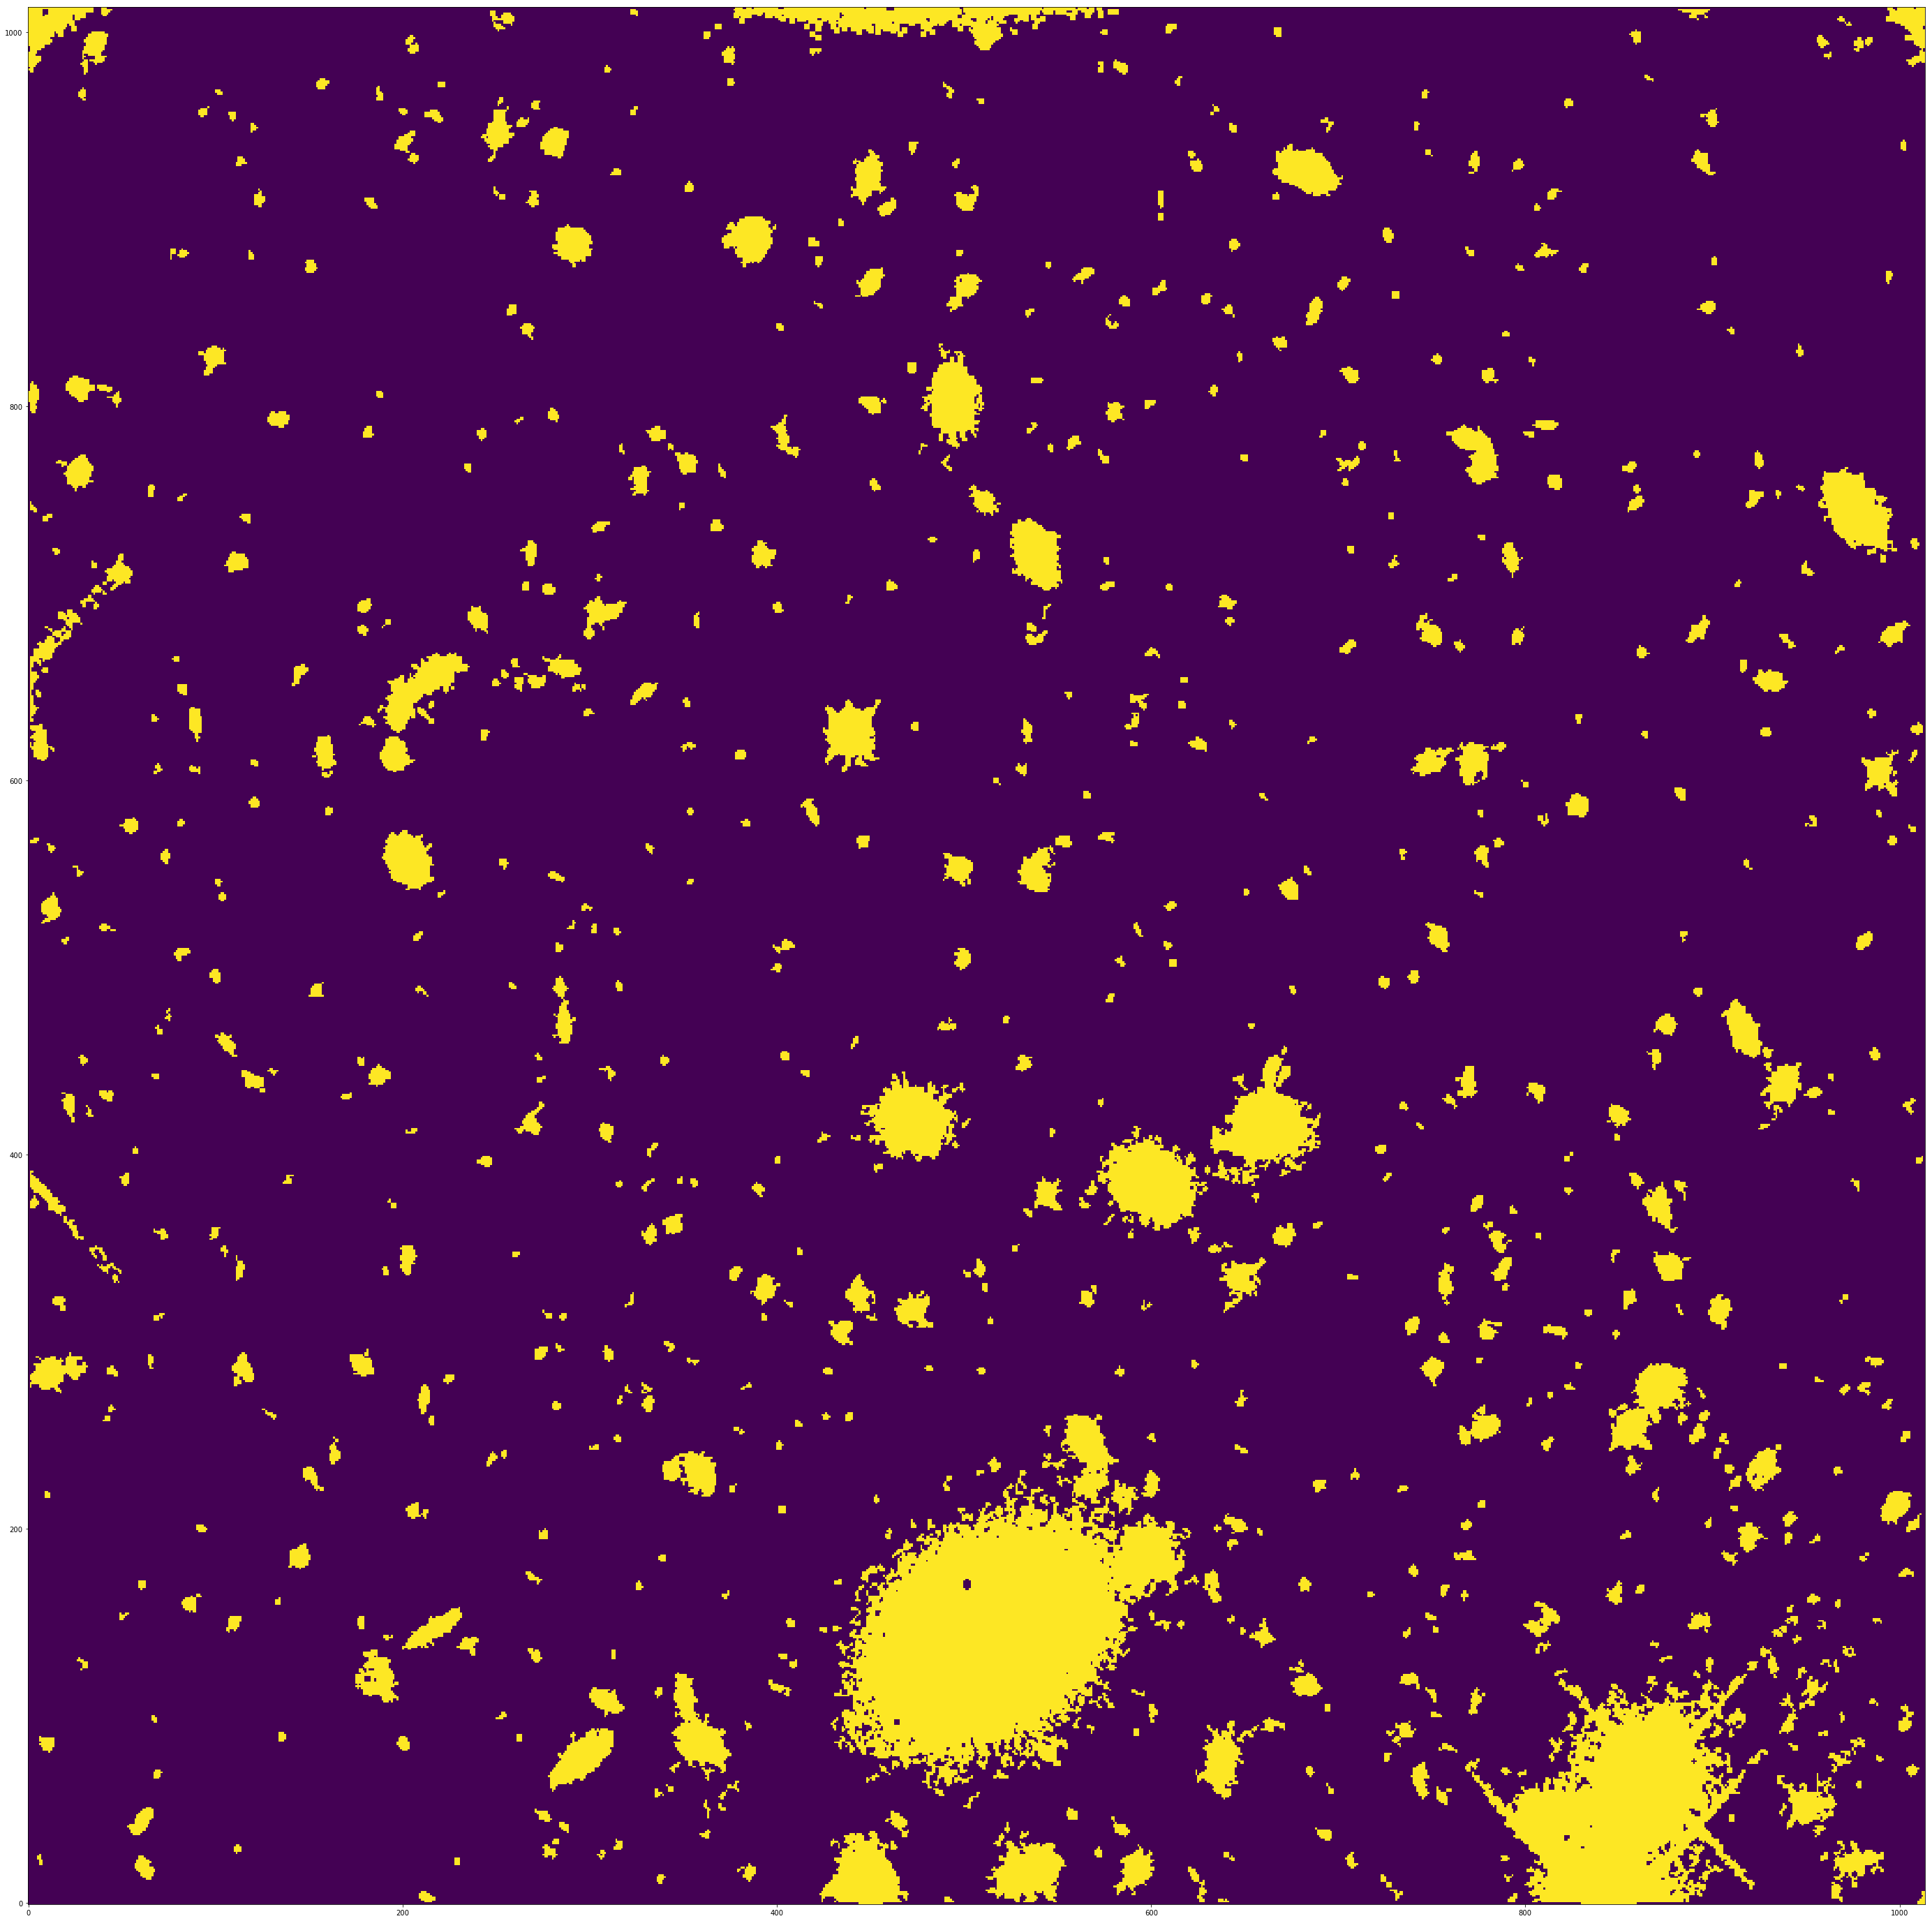

In [25]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504fqq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

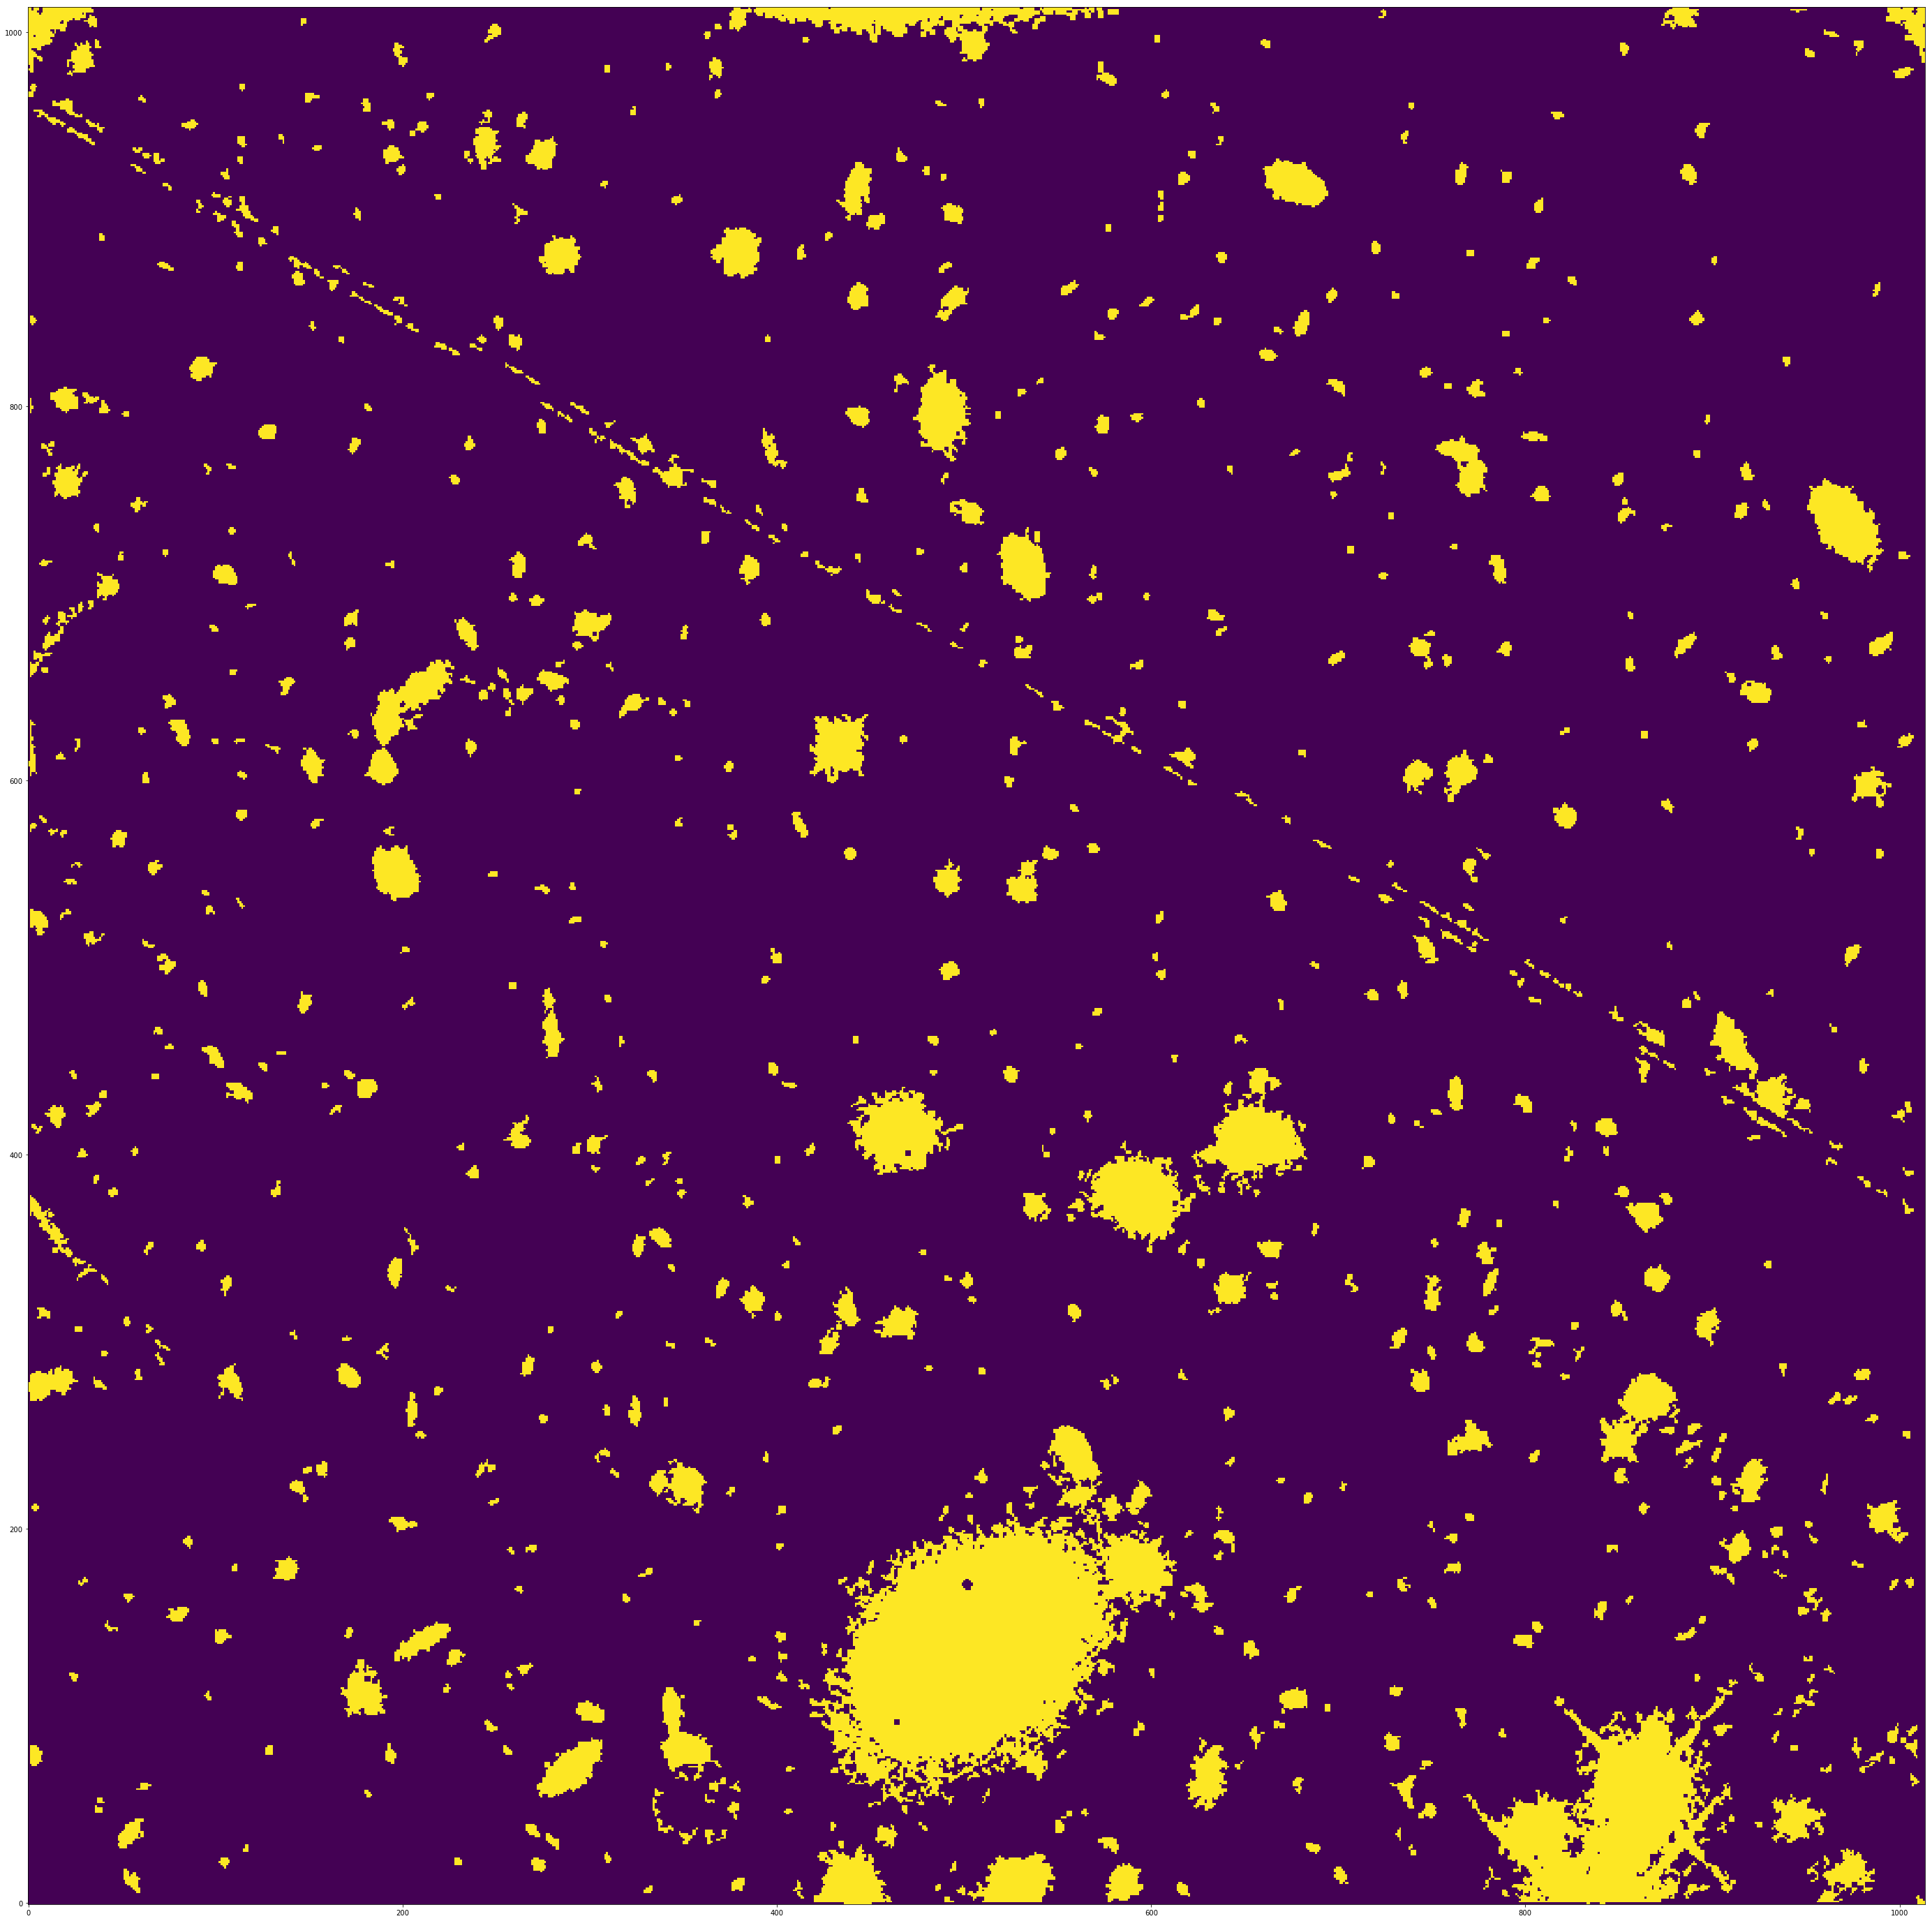

In [26]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504frq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')

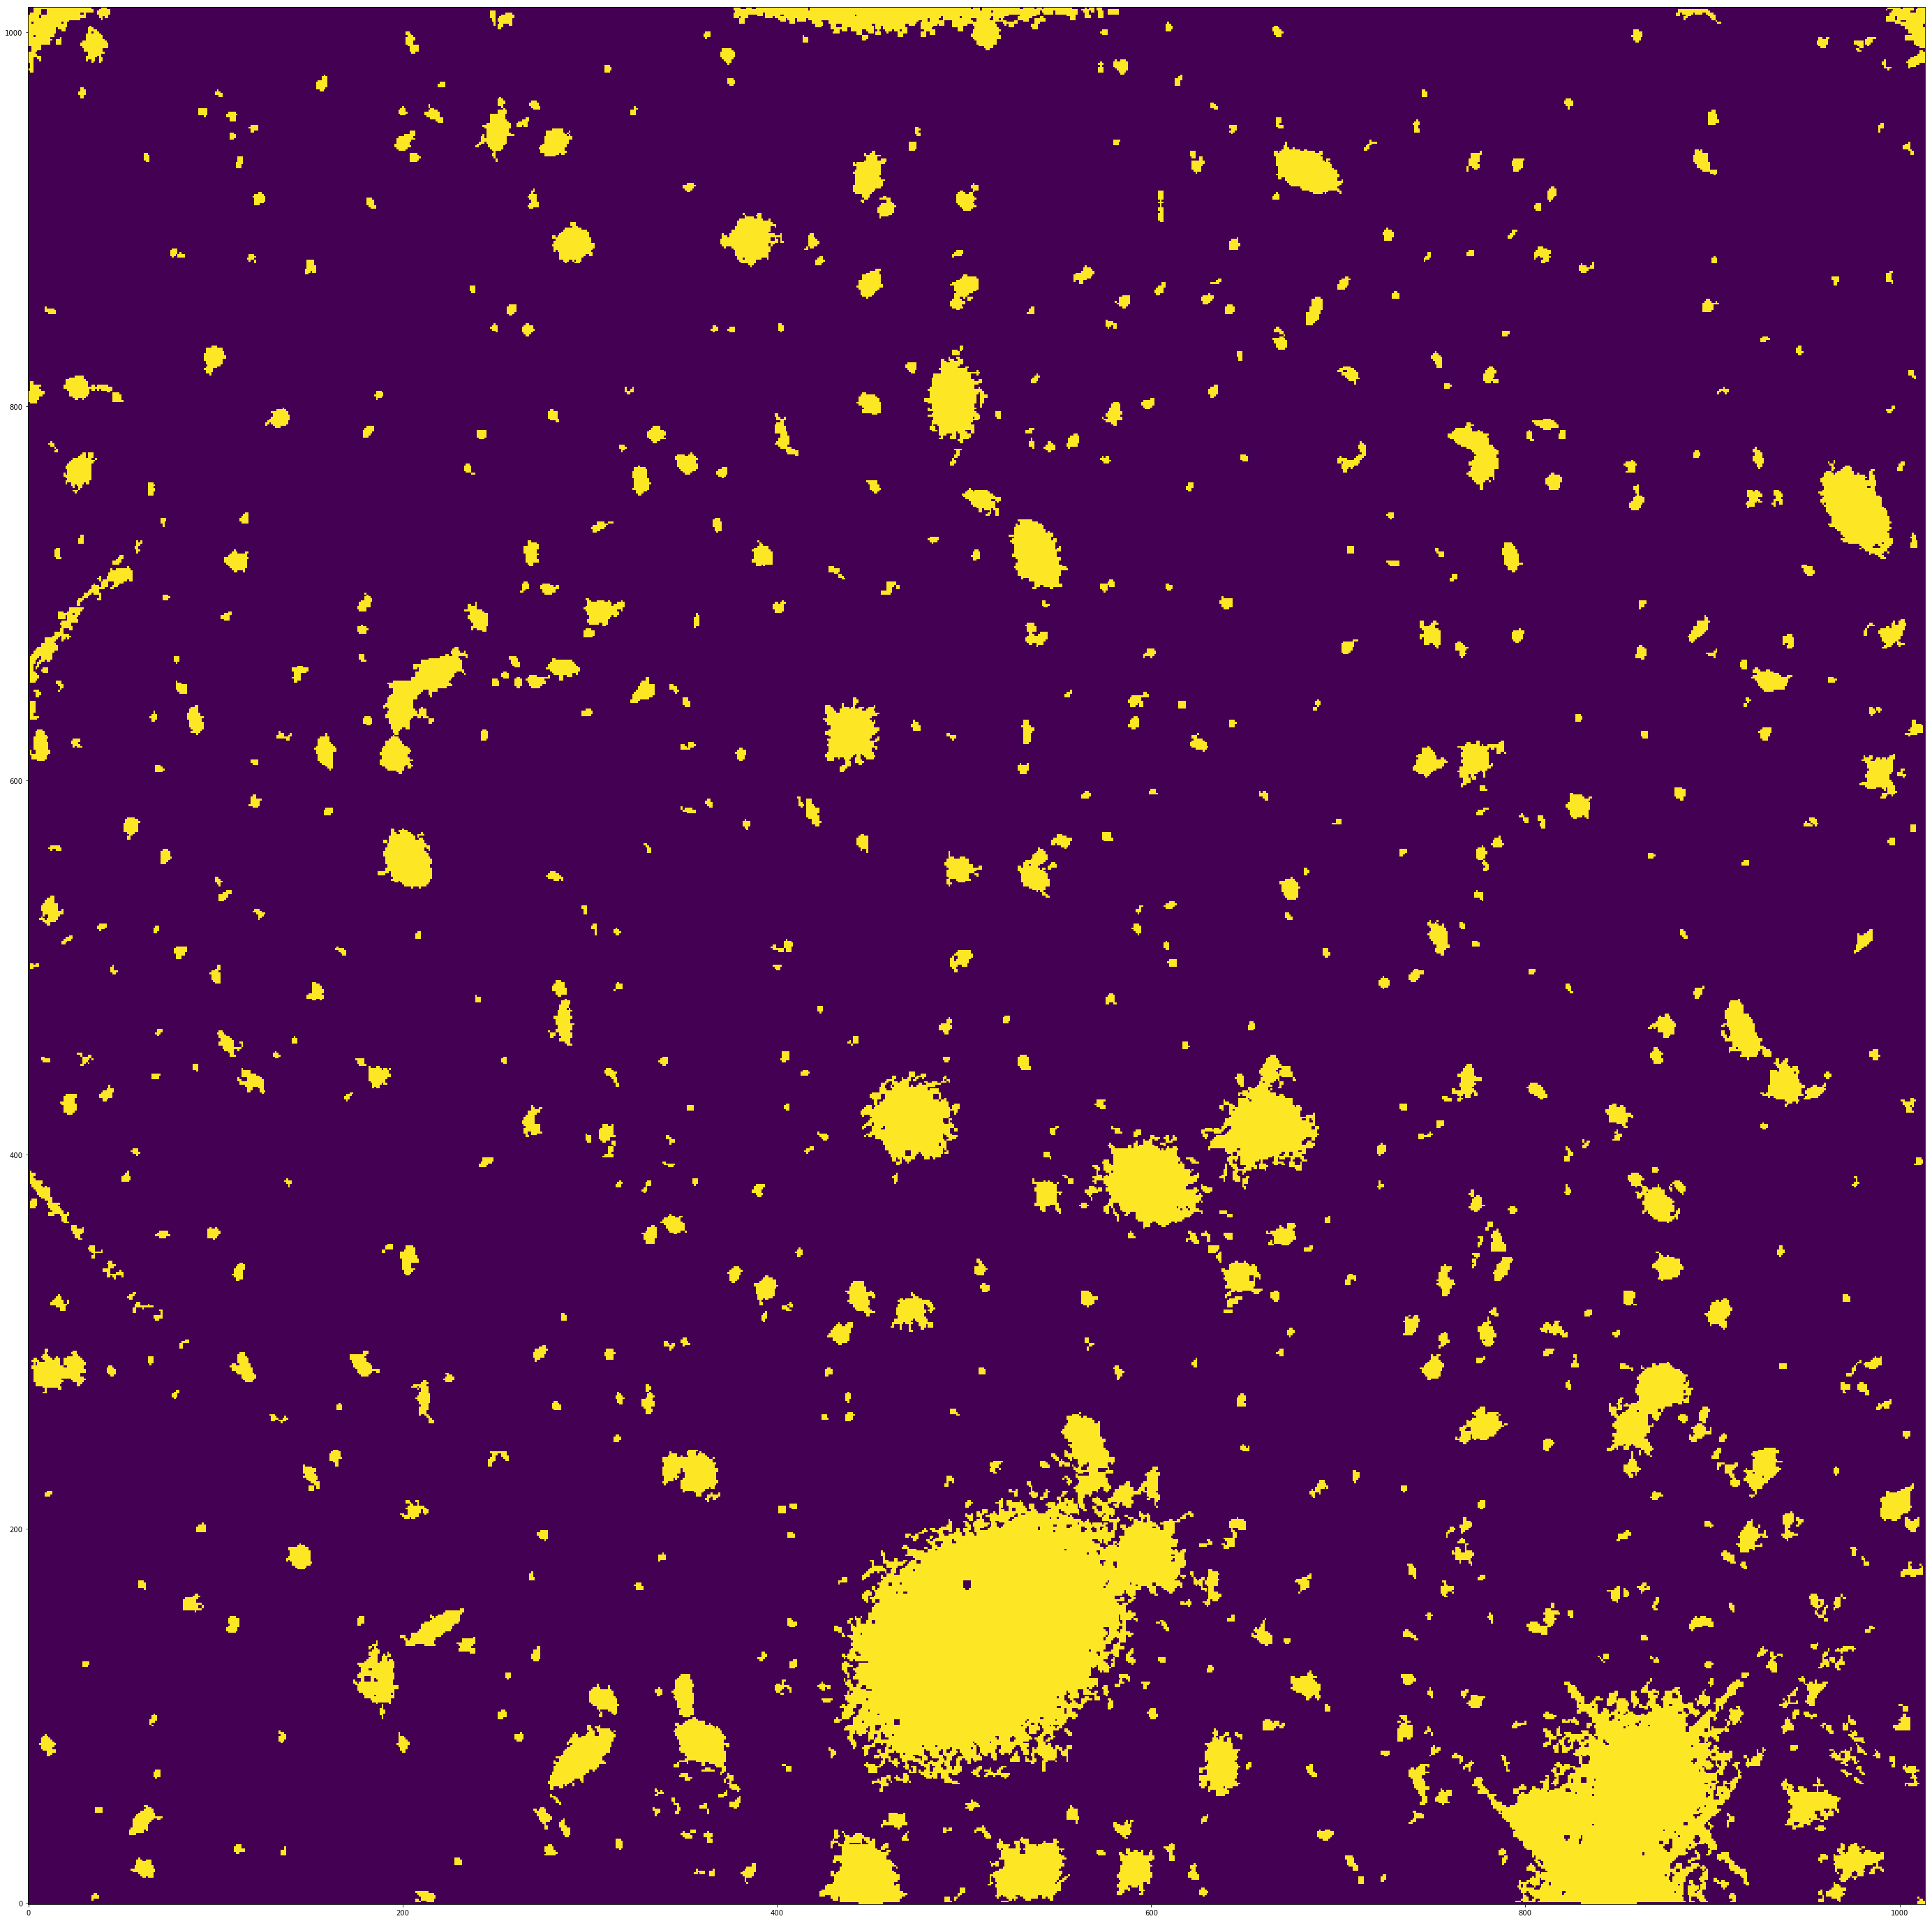

In [27]:
file='/grp/hst/wfc3v/hkurtz/sky_flats/June10_input/icm504fvq_flt.fits'
hdu=fits.open(file)
data=hdu[1].data
%matplotlib inline
seg=find_sources(data)
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1) = plt.subplots(1, 1, figsize=(50, 50))
ax1.imshow(seg, origin='lower')